# ONET Job Database system analysis

The goal of this project is to design a multi-class, multi-label classification app that can predict the title and a set of skills/abilities from a job posting description. We will rely on the O\*NET database to build this system. The O\*NET database is available [here](https://www.onetcenter.org/database.html) and is presented as:   
> The O\*NET database contains a rich set of variables that describe work and worker characteristics, including skill requirements. Developers and other customers are encouraged to incorporate the O\*NET database within their products, services, and research. 

The database is made of of a set of linked tables.  
A subset of the database schema is shown below: 

<img src="Onet-Db-Schema.jpg" >  
  
The database is avaible in several format:    
<img src="DB-Format.jpg" > 

## Loading and review dataset
We will use the files in csv format for this project.  


In [1]:
# Loading Numpy, Pandas and OS packages to load and pre-process the data
import numpy as np
import pandas as pd
import os

In [2]:
# import matplotlib and sns for Exploratory Analysis graphics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Load all the files in a dictionary of pandas Dataframes
df = {}
for _, _, files in os.walk('Dataset/'):
    for filename in files:
        fname = filename[:filename.find('.')]
        fname = fname.replace(' ','_')
        print(fname)
        df[fname] = pd.read_excel('Dataset/' + filename)

Abilities_to_Work_Activities
Abilities_to_Work_Context
Abilities
Emerging_Tasks
Occupation_Data
Skills_to_Work_Activities
Skills_to_Work_Context
Skills
Technology_Skills
Tools_Used
Work_Activities
Work_Context
Work_Styles


### Abilities analysis
The main columns in the abilities table are: 
* **Title**: The worker's titles   
* **Element Name**: The ability name for the current row 
* **Scale Name**: It can be either Importance or Level 
* **Data Value**: Decimal number. The higher the value, and the most likely the worker has this ability  

As each ability is duplicated (one for Importance and one for Level), we will drop the duplicates to keep a single ability. 


In [4]:
df['Abilities']

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,Chief Executives,1.A.1.a.1,Oral Comprehension,IM,Importance,4.50,8.0,0.19,4.13,4.87,N,NaN,07/2014,Analyst
1,11-1011.00,Chief Executives,1.A.1.a.1,Oral Comprehension,LV,Level,4.88,8.0,0.13,4.63,5.12,N,N,07/2014,Analyst
2,11-1011.00,Chief Executives,1.A.1.a.2,Written Comprehension,IM,Importance,4.25,8.0,0.16,3.93,4.57,N,NaN,07/2014,Analyst
3,11-1011.00,Chief Executives,1.A.1.a.2,Written Comprehension,LV,Level,4.62,8.0,0.18,4.27,4.98,N,N,07/2014,Analyst
4,11-1011.00,Chief Executives,1.A.1.a.3,Oral Expression,IM,Importance,4.38,8.0,0.18,4.02,4.73,N,NaN,07/2014,Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100667,53-7121.00,"Tank Car, Truck, and Ship Loaders",1.A.4.b.3,Sound Localization,LV,Level,2.00,8.0,0.00,2.00,2.00,N,N,08/2019,Analyst
100668,53-7121.00,"Tank Car, Truck, and Ship Loaders",1.A.4.b.4,Speech Recognition,IM,Importance,3.12,8.0,0.13,2.88,3.37,N,NaN,08/2019,Analyst
100669,53-7121.00,"Tank Car, Truck, and Ship Loaders",1.A.4.b.4,Speech Recognition,LV,Level,2.75,8.0,0.16,2.43,3.07,N,N,08/2019,Analyst
100670,53-7121.00,"Tank Car, Truck, and Ship Loaders",1.A.4.b.5,Speech Clarity,IM,Importance,3.12,8.0,0.13,2.88,3.37,N,NaN,08/2019,Analyst


In [5]:
# drop duplicated lines
df_abilities = df['Abilities'].drop_duplicates(subset=['Title', 'Element Name'], ignore_index = True)
df_abilities

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,Chief Executives,1.A.1.a.1,Oral Comprehension,IM,Importance,4.50,8.0,0.19,4.13,4.87,N,NaN,07/2014,Analyst
1,11-1011.00,Chief Executives,1.A.1.a.2,Written Comprehension,IM,Importance,4.25,8.0,0.16,3.93,4.57,N,NaN,07/2014,Analyst
2,11-1011.00,Chief Executives,1.A.1.a.3,Oral Expression,IM,Importance,4.38,8.0,0.18,4.02,4.73,N,NaN,07/2014,Analyst
3,11-1011.00,Chief Executives,1.A.1.a.4,Written Expression,IM,Importance,4.12,8.0,0.13,3.88,4.37,N,NaN,07/2014,Analyst
4,11-1011.00,Chief Executives,1.A.1.b.1,Fluency of Ideas,IM,Importance,3.88,8.0,0.13,3.63,4.12,N,NaN,07/2014,Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50331,53-7121.00,"Tank Car, Truck, and Ship Loaders",1.A.4.b.1,Hearing Sensitivity,IM,Importance,3.00,8.0,0.00,3.00,3.00,N,NaN,08/2019,Analyst
50332,53-7121.00,"Tank Car, Truck, and Ship Loaders",1.A.4.b.2,Auditory Attention,IM,Importance,3.00,8.0,0.00,3.00,3.00,N,NaN,08/2019,Analyst
50333,53-7121.00,"Tank Car, Truck, and Ship Loaders",1.A.4.b.3,Sound Localization,IM,Importance,2.00,8.0,0.00,2.00,2.00,N,NaN,08/2019,Analyst
50334,53-7121.00,"Tank Car, Truck, and Ship Loaders",1.A.4.b.4,Speech Recognition,IM,Importance,3.12,8.0,0.13,2.88,3.37,N,NaN,08/2019,Analyst


#### Filter Abilities table
For each title, we will only keep the abilities with the 15 higher Data Values. This means that we will keep the 15 abilities the most represntative of the worker. Moreover, we will also only keep the columns 'O\*NET-SOC Code', 'Title' and 'Element Name'.

In [6]:
# Keep only the 15 abilities with the largest data_value 
df_abilities = df_abilities.groupby('Title').apply( lambda x: x.nlargest(15,'Data Value')).reset_index(drop = True)
df_abilities

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,13-2011.01,Accountants,1.A.1.a.2,Written Comprehension,IM,Importance,4.00,8.0,0.00,4.00,4.00,N,NaN,08/2018,Analyst
1,13-2011.01,Accountants,1.A.1.c.1,Mathematical Reasoning,IM,Importance,4.00,8.0,0.00,4.00,4.00,N,NaN,08/2018,Analyst
2,13-2011.01,Accountants,1.A.1.a.3,Oral Expression,IM,Importance,3.88,8.0,0.13,3.63,4.12,N,NaN,08/2018,Analyst
3,13-2011.01,Accountants,1.A.1.b.4,Deductive Reasoning,IM,Importance,3.88,8.0,0.13,3.63,4.12,N,NaN,08/2018,Analyst
4,13-2011.01,Accountants,1.A.1.c.2,Number Facility,IM,Importance,3.88,8.0,0.13,3.63,4.12,N,NaN,08/2018,Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14515,19-1023.00,Zoologists and Wildlife Biologists,1.A.4.b.4,Speech Recognition,IM,Importance,3.50,8.0,0.19,3.13,3.87,N,NaN,08/2018,Analyst
14516,19-1023.00,Zoologists and Wildlife Biologists,1.A.1.b.7,Category Flexibility,IM,Importance,3.38,8.0,0.18,3.02,3.73,N,NaN,08/2018,Analyst
14517,19-1023.00,Zoologists and Wildlife Biologists,1.A.1.g.1,Selective Attention,IM,Importance,3.25,8.0,0.16,2.93,3.57,N,NaN,08/2018,Analyst
14518,19-1023.00,Zoologists and Wildlife Biologists,1.A.1.b.1,Fluency of Ideas,IM,Importance,3.12,8.0,0.13,2.88,3.37,N,NaN,08/2018,Analyst


In [7]:
df_abilities = df_abilities[['O*NET-SOC Code', 'Title', 'Element Name', ]]
df_abilities

,O*NET-SOC Code,Title,Element Name
0,13-2011.01,Accountants,Written Comprehension
1,13-2011.01,Accountants,Mathematical Reasoning
2,13-2011.01,Accountants,Oral Expression
3,13-2011.01,Accountants,Deductive Reasoning
4,13-2011.01,Accountants,Number Facility
...,...,...,...
14515,19-1023.00,Zoologists and Wildlife Biologists,Speech Recognition
14516,19-1023.00,Zoologists and Wildlife Biologists,Category Flexibility
14517,19-1023.00,Zoologists and Wildlife Biologists,Selective Attention
14518,19-1023.00,Zoologists and Wildlife Biologists,Fluency of Ideas


### Skills analysis
The main columns in the Skills table are: 
* **Title**: The worker's titles   
* **Element Name**: The skill name for the current row 
* **Scale Name**: It can be either Importance or Level 
* **Data Value**: Decimal number. The higher the value, and the most likely the worker has this skill  

As each skill is duplicated (one for Importance and one for Level), we will drop the duplicates to keep a single skill per title.

In [8]:
df['Skills']

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,Chief Executives,2.A.1.a,Reading Comprehension,IM,Importance,4.12,8.0,0.13,3.88,4.37,N,NaN,07/2014,Analyst
1,11-1011.00,Chief Executives,2.A.1.a,Reading Comprehension,LV,Level,4.75,8.0,0.16,4.43,5.07,N,N,07/2014,Analyst
2,11-1011.00,Chief Executives,2.A.1.b,Active Listening,IM,Importance,4.12,8.0,0.13,3.88,4.37,N,NaN,07/2014,Analyst
3,11-1011.00,Chief Executives,2.A.1.b,Active Listening,LV,Level,4.88,8.0,0.23,4.43,5.32,N,N,07/2014,Analyst
4,11-1011.00,Chief Executives,2.A.1.c,Writing,IM,Importance,4.00,8.0,0.00,4.00,4.00,N,NaN,07/2014,Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67755,53-7121.00,"Tank Car, Truck, and Ship Loaders",2.B.5.b,Management of Financial Resources,LV,Level,1.12,8.0,0.13,0.88,1.37,N,N,08/2019,Analyst
67756,53-7121.00,"Tank Car, Truck, and Ship Loaders",2.B.5.c,Management of Material Resources,IM,Importance,2.00,8.0,0.00,2.00,2.00,N,NaN,08/2019,Analyst
67757,53-7121.00,"Tank Car, Truck, and Ship Loaders",2.B.5.c,Management of Material Resources,LV,Level,1.88,8.0,0.13,1.63,2.12,N,N,08/2019,Analyst
67758,53-7121.00,"Tank Car, Truck, and Ship Loaders",2.B.5.d,Management of Personnel Resources,IM,Importance,2.88,8.0,0.13,2.63,3.12,N,NaN,08/2019,Analyst


#### Filter Skills table
For each title, we will only keep the Skills with the 10 higher Data Values. This means that we will keep the 10 skills the most represntative of the worker. Moreover, we will also only keep the columns 'O\*NET-SOC Code', 'Title' and 'Element Name'.

In [9]:
# Drop duplicate skills 
df_skills = df['Skills'].drop_duplicates(subset=['Title', 'Element Name'], ignore_index = True)
df_skills

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,Chief Executives,2.A.1.a,Reading Comprehension,IM,Importance,4.12,8.0,0.13,3.88,4.37,N,NaN,07/2014,Analyst
1,11-1011.00,Chief Executives,2.A.1.b,Active Listening,IM,Importance,4.12,8.0,0.13,3.88,4.37,N,NaN,07/2014,Analyst
2,11-1011.00,Chief Executives,2.A.1.c,Writing,IM,Importance,4.00,8.0,0.00,4.00,4.00,N,NaN,07/2014,Analyst
3,11-1011.00,Chief Executives,2.A.1.d,Speaking,IM,Importance,4.38,8.0,0.18,4.02,4.73,N,NaN,07/2014,Analyst
4,11-1011.00,Chief Executives,2.A.1.e,Mathematics,IM,Importance,3.25,8.0,0.16,2.93,3.57,N,NaN,07/2014,Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33875,53-7121.00,"Tank Car, Truck, and Ship Loaders",2.B.4.h,Systems Evaluation,IM,Importance,2.12,8.0,0.13,1.88,2.37,N,NaN,08/2019,Analyst
33876,53-7121.00,"Tank Car, Truck, and Ship Loaders",2.B.5.a,Time Management,IM,Importance,3.12,8.0,0.13,2.88,3.37,N,NaN,08/2019,Analyst
33877,53-7121.00,"Tank Car, Truck, and Ship Loaders",2.B.5.b,Management of Financial Resources,IM,Importance,2.00,8.0,0.00,2.00,2.00,N,NaN,08/2019,Analyst
33878,53-7121.00,"Tank Car, Truck, and Ship Loaders",2.B.5.c,Management of Material Resources,IM,Importance,2.00,8.0,0.00,2.00,2.00,N,NaN,08/2019,Analyst


In [10]:
# Keep only the 10 skills with the largest data_values
df_skills = df_skills.groupby('Title').apply( lambda x: x.nlargest(10,'Data Value')).reset_index(drop = True)
df_skills 

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,13-2011.01,Accountants,2.A.1.a,Reading Comprehension,IM,Importance,3.88,8.0,0.13,3.63,4.12,N,NaN,08/2018,Analyst
1,13-2011.01,Accountants,2.A.1.b,Active Listening,IM,Importance,3.88,8.0,0.13,3.63,4.12,N,NaN,08/2018,Analyst
2,13-2011.01,Accountants,2.A.1.e,Mathematics,IM,Importance,3.88,8.0,0.13,3.63,4.12,N,NaN,08/2018,Analyst
3,13-2011.01,Accountants,2.A.2.a,Critical Thinking,IM,Importance,3.88,8.0,0.13,3.63,4.12,N,NaN,08/2018,Analyst
4,13-2011.01,Accountants,2.A.1.d,Speaking,IM,Importance,3.75,8.0,0.16,3.43,4.07,N,NaN,08/2018,Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9675,19-1023.00,Zoologists and Wildlife Biologists,2.A.1.d,Speaking,IM,Importance,3.88,8.0,0.13,3.63,4.12,N,NaN,08/2018,Analyst
9676,19-1023.00,Zoologists and Wildlife Biologists,2.A.2.b,Active Learning,IM,Importance,3.75,8.0,0.16,3.43,4.07,N,NaN,08/2018,Analyst
9677,19-1023.00,Zoologists and Wildlife Biologists,2.B.2.i,Complex Problem Solving,IM,Importance,3.75,8.0,0.16,3.43,4.07,N,NaN,08/2018,Analyst
9678,19-1023.00,Zoologists and Wildlife Biologists,2.B.4.e,Judgment and Decision Making,IM,Importance,3.75,8.0,0.16,3.43,4.07,N,NaN,08/2018,Analyst


In [11]:
df_skills = df_skills[['O*NET-SOC Code', 'Title', 'Element Name']]
df_skills

,O*NET-SOC Code,Title,Element Name
0,13-2011.01,Accountants,Reading Comprehension
1,13-2011.01,Accountants,Active Listening
2,13-2011.01,Accountants,Mathematics
3,13-2011.01,Accountants,Critical Thinking
4,13-2011.01,Accountants,Speaking
...,...,...,...
9675,19-1023.00,Zoologists and Wildlife Biologists,Speaking
9676,19-1023.00,Zoologists and Wildlife Biologists,Active Learning
9677,19-1023.00,Zoologists and Wildlife Biologists,Complex Problem Solving
9678,19-1023.00,Zoologists and Wildlife Biologists,Judgment and Decision Making


### Work Activities analysis
The main columns in the Work Activities table are: 
* **Title**: The worker's titles   
* **Element Name**: The Work Activity name for the current row 
* **Scale Name**: It can be either Importance or Level 
* **Data Value**: Decimal number. The higher the value, and the most likely the worker has this Work Activity  

As each Work Activity is duplicated (one for Importance and one for Level), we will drop the duplicates to keep a single Work Activity per title.

In [12]:
df['Work_Activities']

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,Chief Executives,4.A.1.a.1,Getting Information,IM,Importance,4.72,35.0,0.13,4.46,4.98,N,NaN,07/2014,Incumbent
1,11-1011.00,Chief Executives,4.A.1.a.1,Getting Information,LV,Level,5.35,35.0,0.23,4.89,5.81,N,N,07/2014,Incumbent
2,11-1011.00,Chief Executives,4.A.1.a.2,"Monitor Processes, Materials, or Surroundings",IM,Importance,3.68,35.0,0.17,3.33,4.03,N,NaN,07/2014,Incumbent
3,11-1011.00,Chief Executives,4.A.1.a.2,"Monitor Processes, Materials, or Surroundings",LV,Level,4.76,34.0,0.27,4.22,5.30,N,N,07/2014,Incumbent
4,11-1011.00,Chief Executives,4.A.1.b.1,"Identifying Objects, Actions, and Events",IM,Importance,4.20,35.0,0.15,3.91,4.50,N,NaN,07/2014,Incumbent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71581,53-7121.00,"Tank Car, Truck, and Ship Loaders",4.A.4.c.1,Performing Administrative Activities,LV,Level,2.27,27.0,0.32,1.61,2.92,N,N,08/2019,Incumbent
71582,53-7121.00,"Tank Car, Truck, and Ship Loaders",4.A.4.c.2,Staffing Organizational Units,IM,Importance,1.93,27.0,0.21,1.50,2.37,N,NaN,08/2019,Incumbent
71583,53-7121.00,"Tank Car, Truck, and Ship Loaders",4.A.4.c.2,Staffing Organizational Units,LV,Level,1.60,27.0,0.30,0.99,2.21,N,N,08/2019,Incumbent
71584,53-7121.00,"Tank Car, Truck, and Ship Loaders",4.A.4.c.3,Monitoring and Controlling Resources,IM,Importance,2.56,27.0,0.26,2.03,3.09,N,NaN,08/2019,Incumbent


In [13]:
df_wk_activities = df['Work_Activities'].drop_duplicates(subset=['Title', 'Element Name'], ignore_index = True)
df_wk_activities

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,Chief Executives,4.A.1.a.1,Getting Information,IM,Importance,4.72,35.0,0.13,4.46,4.98,N,NaN,07/2014,Incumbent
1,11-1011.00,Chief Executives,4.A.1.a.2,"Monitor Processes, Materials, or Surroundings",IM,Importance,3.68,35.0,0.17,3.33,4.03,N,NaN,07/2014,Incumbent
2,11-1011.00,Chief Executives,4.A.1.b.1,"Identifying Objects, Actions, and Events",IM,Importance,4.20,35.0,0.15,3.91,4.50,N,NaN,07/2014,Incumbent
3,11-1011.00,Chief Executives,4.A.1.b.2,"Inspecting Equipment, Structures, or Material",IM,Importance,2.38,35.0,0.29,1.80,2.96,N,NaN,07/2014,Incumbent
4,11-1011.00,Chief Executives,4.A.1.b.3,Estimating the Quantifiable Characteristics of...,IM,Importance,3.59,35.0,0.34,2.91,4.27,N,NaN,07/2014,Incumbent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35788,53-7121.00,"Tank Car, Truck, and Ship Loaders",4.A.4.b.5,Coaching and Developing Others,IM,Importance,3.07,26.0,0.20,2.66,3.49,N,NaN,08/2019,Incumbent
35789,53-7121.00,"Tank Car, Truck, and Ship Loaders",4.A.4.b.6,Provide Consultation and Advice to Others,IM,Importance,2.72,27.0,0.19,2.33,3.10,N,NaN,08/2019,Incumbent
35790,53-7121.00,"Tank Car, Truck, and Ship Loaders",4.A.4.c.1,Performing Administrative Activities,IM,Importance,2.54,27.0,0.21,2.10,2.98,N,NaN,08/2019,Incumbent
35791,53-7121.00,"Tank Car, Truck, and Ship Loaders",4.A.4.c.2,Staffing Organizational Units,IM,Importance,1.93,27.0,0.21,1.50,2.37,N,NaN,08/2019,Incumbent


#### Filter Work Activities table
For each title, we will only keep the  Work Activities with the 20 higher Data Values. This means that we will keep the 20 Work Activities the most represntative of the worker. Moreover, we will also only keep the columns 'O\*NET-SOC Code', 'Title' and 'Element Name'.

In [14]:
# Keep only the 10 activities with the largest data_values
df_wk_activities = df_wk_activities.groupby('Title').apply( lambda x: x.nlargest(20,'Data Value')).reset_index(drop = True)
df_wk_activities

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,13-2011.00,Accountants and Auditors,4.A.1.a.1,Getting Information,IM,Importance,4.46,NaN,NaN,NaN,NaN,N,NaN,11/2020,Analyst - Transition
1,13-2011.00,Accountants and Auditors,4.A.3.b.1,Interacting With Computers,IM,Importance,4.45,NaN,NaN,NaN,NaN,N,NaN,11/2020,Analyst - Transition
2,13-2011.00,Accountants and Auditors,4.A.4.a.2,"Communicating with Supervisors, Peers, or Subo...",IM,Importance,4.42,NaN,NaN,NaN,NaN,N,NaN,11/2020,Analyst - Transition
3,13-2011.00,Accountants and Auditors,4.A.2.a.3,Evaluating Information to Determine Compliance...,IM,Importance,4.36,NaN,NaN,NaN,NaN,N,NaN,11/2020,Analyst - Transition
4,13-2011.00,Accountants and Auditors,4.A.3.b.6,Documenting/Recording Information,IM,Importance,4.27,NaN,NaN,NaN,NaN,N,NaN,11/2020,Analyst - Transition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17455,19-1023.00,Zoologists and Wildlife Biologists,4.A.1.b.3,Estimating the Quantifiable Characteristics of...,IM,Importance,3.84,38.0,0.16,3.52,4.16,N,NaN,08/2018,Incumbent
17456,19-1023.00,Zoologists and Wildlife Biologists,4.A.2.b.5,Scheduling Work and Activities,IM,Importance,3.84,38.0,0.19,3.46,4.22,N,NaN,08/2018,Incumbent
17457,19-1023.00,Zoologists and Wildlife Biologists,4.A.2.b.2,Thinking Creatively,IM,Importance,3.72,38.0,0.17,3.39,4.06,N,NaN,08/2018,Incumbent
17458,19-1023.00,Zoologists and Wildlife Biologists,4.A.4.a.8,Performing for or Working Directly with the Pu...,IM,Importance,3.62,38.0,0.26,3.09,4.16,N,NaN,08/2018,Incumbent


In [15]:
df_wk_activities = df_wk_activities[['O*NET-SOC Code', 'Title', 'Element Name']]
df_wk_activities

,O*NET-SOC Code,Title,Element Name
0,13-2011.00,Accountants and Auditors,Getting Information
1,13-2011.00,Accountants and Auditors,Interacting With Computers
2,13-2011.00,Accountants and Auditors,"Communicating with Supervisors, Peers, or Subo..."
3,13-2011.00,Accountants and Auditors,Evaluating Information to Determine Compliance...
4,13-2011.00,Accountants and Auditors,Documenting/Recording Information
...,...,...,...
17455,19-1023.00,Zoologists and Wildlife Biologists,Estimating the Quantifiable Characteristics of...
17456,19-1023.00,Zoologists and Wildlife Biologists,Scheduling Work and Activities
17457,19-1023.00,Zoologists and Wildlife Biologists,Thinking Creatively
17458,19-1023.00,Zoologists and Wildlife Biologists,Performing for or Working Directly with the Pu...


#### Merge Work Activities and Abilities_to_Work_Activities tables
The link between the tables Abilities and Work Activities is done by the table Abilities_to_Work_Activities. We will use Pandas merge function to merge the tables Work Activities and Abilities_to_Work_Activities.   

In [16]:
ab_wk_activities = pd.merge(df_wk_activities, df['Abilities_to_Work_Activities'], left_on= 'Element Name', right_on= 'Work Activities Element Name')
ab_wk_activities

,O*NET-SOC Code,Title,Element Name,Abilities Element ID,Abilities Element Name,Work Activities Element ID,Work Activities Element Name
0,13-2011.00,Accountants and Auditors,Getting Information,1.A.1.a.1,Oral Comprehension,4.A.1.a.1,Getting Information
1,13-2011.00,Accountants and Auditors,Getting Information,1.A.1.a.2,Written Comprehension,4.A.1.a.1,Getting Information
2,13-2011.00,Accountants and Auditors,Getting Information,1.A.1.a.3,Oral Expression,4.A.1.a.1,Getting Information
3,13-2011.00,Accountants and Auditors,Getting Information,1.A.1.b.5,Inductive Reasoning,4.A.1.a.1,Getting Information
4,13-2011.00,Accountants and Auditors,Getting Information,1.A.1.e.2,Flexibility of Closure,4.A.1.a.1,Getting Information
...,...,...,...,...,...,...,...
154969,11-3071.04,Supply Chain Managers,Staffing Organizational Units,1.A.1.b.5,Inductive Reasoning,4.A.4.c.2,Staffing Organizational Units
154970,11-3071.04,Supply Chain Managers,Staffing Organizational Units,1.A.1.b.6,Information Ordering,4.A.4.c.2,Staffing Organizational Units
154971,11-3071.04,Supply Chain Managers,Staffing Organizational Units,1.A.1.b.7,Category Flexibility,4.A.4.c.2,Staffing Organizational Units
154972,11-3071.04,Supply Chain Managers,Staffing Organizational Units,1.A.4.b.4,Speech Recognition,4.A.4.c.2,Staffing Organizational Units


In [17]:
# As the columns 'Work Activities Element Name' and  'Element Name' are the same, we will drop the later
# We will also drop the useless columns 'Abilities Element ID' and 'Work Activities Element ID'
ab_wk_activities = ab_wk_activities.drop(columns=['Abilities Element ID', 'Work Activities Element ID', 'Element Name'])
ab_wk_activities

,O*NET-SOC Code,Title,Abilities Element Name,Work Activities Element Name
0,13-2011.00,Accountants and Auditors,Oral Comprehension,Getting Information
1,13-2011.00,Accountants and Auditors,Written Comprehension,Getting Information
2,13-2011.00,Accountants and Auditors,Oral Expression,Getting Information
3,13-2011.00,Accountants and Auditors,Inductive Reasoning,Getting Information
4,13-2011.00,Accountants and Auditors,Flexibility of Closure,Getting Information
...,...,...,...,...
154969,11-3071.04,Supply Chain Managers,Inductive Reasoning,Staffing Organizational Units
154970,11-3071.04,Supply Chain Managers,Information Ordering,Staffing Organizational Units
154971,11-3071.04,Supply Chain Managers,Category Flexibility,Staffing Organizational Units
154972,11-3071.04,Supply Chain Managers,Speech Recognition,Staffing Organizational Units


In [18]:
# We rename "Abilities Element Name" to "Element Name" to be able to merge later with df_abilities
ab_wk_activities = ab_wk_activities.rename(columns={"Abilities Element Name": "Element Name"})
ab_wk_activities

,O*NET-SOC Code,Title,Element Name,Work Activities Element Name
0,13-2011.00,Accountants and Auditors,Oral Comprehension,Getting Information
1,13-2011.00,Accountants and Auditors,Written Comprehension,Getting Information
2,13-2011.00,Accountants and Auditors,Oral Expression,Getting Information
3,13-2011.00,Accountants and Auditors,Inductive Reasoning,Getting Information
4,13-2011.00,Accountants and Auditors,Flexibility of Closure,Getting Information
...,...,...,...,...
154969,11-3071.04,Supply Chain Managers,Inductive Reasoning,Staffing Organizational Units
154970,11-3071.04,Supply Chain Managers,Information Ordering,Staffing Organizational Units
154971,11-3071.04,Supply Chain Managers,Category Flexibility,Staffing Organizational Units
154972,11-3071.04,Supply Chain Managers,Speech Recognition,Staffing Organizational Units


#### Merge df_abilities and ab_wk_activities

In [19]:
act_abilities = pd.merge(df_abilities, ab_wk_activities, on=['O*NET-SOC Code', 'Title', 'Element Name'])
act_abilities

,O*NET-SOC Code,Title,Element Name,Work Activities Element Name
0,27-2011.00,Actors,Oral Expression,Getting Information
1,27-2011.00,Actors,Oral Expression,"Communicating with Supervisors, Peers, or Subo..."
2,27-2011.00,Actors,Oral Expression,Establishing and Maintaining Interpersonal Rel...
3,27-2011.00,Actors,Oral Expression,Communicating with Persons Outside Organization
4,27-2011.00,Actors,Oral Expression,Interpreting the Meaning of Information for Ot...
...,...,...,...,...
79355,19-1023.00,Zoologists and Wildlife Biologists,Fluency of Ideas,Thinking Creatively
79356,19-1023.00,Zoologists and Wildlife Biologists,Fluency of Ideas,Developing Objectives and Strategies
79357,19-1023.00,Zoologists and Wildlife Biologists,Originality,Making Decisions and Solving Problems
79358,19-1023.00,Zoologists and Wildlife Biologists,Originality,Thinking Creatively


### Work Context analysis
The main columns in the Work Context table are: 
* **Title**: The worker's titles   
* **Element Name**: The Work Context name for the current row.  
* **Scale Name**: Here it's more complicated as Scale Name can be Context or a Context Category. And there are 2 possible contexts that are gigen by the Scale ID column(CX or CT)   
* **Scale ID**: The Context ID. It can be CX, CXP, CT, CTP
* **Data Value**: Decimal number. The higher the value, and the most likely the worker has this work context attached  


In [20]:
df['Work_Context']

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Category,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,Chief Executives,4.C.1.a.2.c,Public Speaking,CX,Context,NaN,3.39,25.0,0.22,2.93,3.86,N,NaN,07/2014,Incumbent
1,11-1011.00,Chief Executives,4.C.1.a.2.c,Public Speaking,CXP,Context (Categories 1-5),1.0,6.02,25.0,5.14,0.97,29.49,N,NaN,07/2014,Incumbent
2,11-1011.00,Chief Executives,4.C.1.a.2.c,Public Speaking,CXP,Context (Categories 1-5),2.0,12.40,25.0,7.33,3.39,36.32,N,NaN,07/2014,Incumbent
3,11-1011.00,Chief Executives,4.C.1.a.2.c,Public Speaking,CXP,Context (Categories 1-5),3.0,23.36,25.0,10.36,8.45,50.16,N,NaN,07/2014,Incumbent
4,11-1011.00,Chief Executives,4.C.1.a.2.c,Public Speaking,CXP,Context (Categories 1-5),4.0,52.55,25.0,12.13,28.87,75.14,N,NaN,07/2014,Incumbent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326879,53-7121.00,"Tank Car, Truck, and Ship Loaders",4.C.3.d.4,Work Schedules,CTP,Context (Categories 1-3),3.0,0.89,32.0,0.98,0.09,7.87,N,NaN,08/2019,Incumbent
326880,53-7121.00,"Tank Car, Truck, and Ship Loaders",4.C.3.d.8,Duration of Typical Work Week,CT,Context,NaN,2.82,32.0,0.10,2.62,3.00,N,NaN,08/2019,Incumbent
326881,53-7121.00,"Tank Car, Truck, and Ship Loaders",4.C.3.d.8,Duration of Typical Work Week,CTP,Context (Categories 1-3),1.0,0.00,32.0,0.00,NaN,NaN,N,NaN,08/2019,Incumbent
326882,53-7121.00,"Tank Car, Truck, and Ship Loaders",4.C.3.d.8,Duration of Typical Work Week,CTP,Context (Categories 1-3),2.0,17.56,32.0,9.83,5.06,45.99,N,NaN,08/2019,Incumbent


#### Filter Work Context table
The detailed contexts CXP and CTP rows contains too much information. Therefore we will filter out those rows. We will work only on the summary rows (with Scale ID Context). Moreover the CT Context are related to work duration and schedule. We will also filter out those contexts.   
For each title, we will only keep the CX Work Context with the 20 higher Data Values. This means that we will keep the 20 CX Work Context the most represntative of the worker. Moreover, we will also only keep the columns 'O*NET-SOC Code', 'Title' and 'Element Name'.

In [21]:
# Keep only the 20 work context with the largest data_values
df_work_context = df['Work_Context'][(df['Work_Context']['Scale Name'] == 'Context') & (df['Work_Context']['Scale ID'] == 'CX')] \
                    .groupby('Title').apply( lambda x: x.nlargest(20,'Data Value')).reset_index(drop = True)
df_work_context

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Category,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,13-2011.01,Accountants,4.C.1.a.2.h,Electronic Mail,CX,Context,NaN,4.97,47.0,0.03,4.92,5.00,N,NaN,08/2018,Incumbent
1,13-2011.01,Accountants,4.C.3.b.4,Importance of Being Exact or Accurate,CX,Context,NaN,4.91,47.0,0.04,4.83,5.00,N,NaN,08/2018,Incumbent
2,13-2011.01,Accountants,4.C.1.a.2.f,Telephone,CX,Context,NaN,4.89,46.0,0.06,4.78,5.00,N,NaN,08/2018,Incumbent
3,13-2011.01,Accountants,4.C.3.b.8,Structured versus Unstructured Work,CX,Context,NaN,4.71,47.0,0.11,4.48,4.94,N,NaN,08/2018,Incumbent
4,13-2011.01,Accountants,4.C.2.a.1.a,"Indoors, Environmentally Controlled",CX,Context,NaN,4.70,45.0,0.17,4.35,5.00,N,NaN,08/2018,Incumbent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19355,19-1023.00,Zoologists and Wildlife Biologists,4.C.2.d.1.a,Spend Time Sitting,CX,Context,NaN,3.60,38.0,0.19,3.21,3.99,N,NaN,08/2018,Incumbent
19356,19-1023.00,Zoologists and Wildlife Biologists,4.C.3.a.2.b,Frequency of Decision Making,CX,Context,NaN,3.60,38.0,0.21,3.18,4.03,N,NaN,08/2018,Incumbent
19357,19-1023.00,Zoologists and Wildlife Biologists,4.C.2.a.1.c,"Outdoors, Exposed to Weather",CX,Context,NaN,3.58,38.0,0.15,3.28,3.89,N,NaN,08/2018,Incumbent
19358,19-1023.00,Zoologists and Wildlife Biologists,4.C.3.c.1,Level of Competition,CX,Context,NaN,3.45,36.0,0.19,3.06,3.85,N,NaN,08/2018,Incumbent


In [22]:
df_work_context = df_work_context[['O*NET-SOC Code', 'Title', 'Element Name']]
df_work_context

,O*NET-SOC Code,Title,Element Name
0,13-2011.01,Accountants,Electronic Mail
1,13-2011.01,Accountants,Importance of Being Exact or Accurate
2,13-2011.01,Accountants,Telephone
3,13-2011.01,Accountants,Structured versus Unstructured Work
4,13-2011.01,Accountants,"Indoors, Environmentally Controlled"
...,...,...,...
19355,19-1023.00,Zoologists and Wildlife Biologists,Spend Time Sitting
19356,19-1023.00,Zoologists and Wildlife Biologists,Frequency of Decision Making
19357,19-1023.00,Zoologists and Wildlife Biologists,"Outdoors, Exposed to Weather"
19358,19-1023.00,Zoologists and Wildlife Biologists,Level of Competition


#### Merge Work Context and Abilities_to_Work_Context tables
The link between the tables Abilities and Work Context is done by the table Abilities_to_Work_Context. We will use Pandas merge function to merge the tables Work Context and Abilities_to_Work_Context.  

In [23]:
ab_work_context = pd.merge(df_work_context, df['Abilities_to_Work_Context'], left_on= 'Element Name', right_on= 'Work Context Element Name')
ab_work_context

,O*NET-SOC Code,Title,Element Name,Abilities Element ID,Abilities Element Name,Work Context Element ID,Work Context Element Name
0,13-2011.01,Accountants,Electronic Mail,1.A.1.a.2,Written Comprehension,4.C.1.a.2.h,Electronic Mail
1,13-2011.01,Accountants,Electronic Mail,1.A.1.a.4,Written Expression,4.C.1.a.2.h,Electronic Mail
2,13-2011.01,Accountants,Electronic Mail,1.A.4.a.1,Near Vision,4.C.1.a.2.h,Electronic Mail
3,27-2011.00,Actors,Electronic Mail,1.A.1.a.2,Written Comprehension,4.C.1.a.2.h,Electronic Mail
4,27-2011.00,Actors,Electronic Mail,1.A.1.a.4,Written Expression,4.C.1.a.2.h,Electronic Mail
...,...,...,...,...,...,...,...
54684,53-7111.00,Mine Shuttle Car Operators,Exposed to Whole Body Vibration,1.A.3.a.4,Trunk Strength,4.C.2.b.1.f,Exposed to Whole Body Vibration
54685,47-2071.00,"Paving, Surfacing, and Tamping Equipment Opera...",Exposed to Whole Body Vibration,1.A.3.a.4,Trunk Strength,4.C.2.b.1.f,Exposed to Whole Body Vibration
54686,47-2151.00,Pipelayers,Exposed to Whole Body Vibration,1.A.3.a.4,Trunk Strength,4.C.2.b.1.f,Exposed to Whole Body Vibration
54687,47-5051.00,"Rock Splitters, Quarry",Exposed to Whole Body Vibration,1.A.3.a.4,Trunk Strength,4.C.2.b.1.f,Exposed to Whole Body Vibration


In [24]:
# Work Context Element Name and Element Name columns are the same, therefore we are dropping the later
# We also drop 'Abilities Element ID', and 'Work Context Element ID' columns
ab_work_context = ab_work_context.drop(columns=['Element Name', 'Abilities Element ID', 'Work Context Element ID'])
ab_work_context

,O*NET-SOC Code,Title,Abilities Element Name,Work Context Element Name
0,13-2011.01,Accountants,Written Comprehension,Electronic Mail
1,13-2011.01,Accountants,Written Expression,Electronic Mail
2,13-2011.01,Accountants,Near Vision,Electronic Mail
3,27-2011.00,Actors,Written Comprehension,Electronic Mail
4,27-2011.00,Actors,Written Expression,Electronic Mail
...,...,...,...,...
54684,53-7111.00,Mine Shuttle Car Operators,Trunk Strength,Exposed to Whole Body Vibration
54685,47-2071.00,"Paving, Surfacing, and Tamping Equipment Opera...",Trunk Strength,Exposed to Whole Body Vibration
54686,47-2151.00,Pipelayers,Trunk Strength,Exposed to Whole Body Vibration
54687,47-5051.00,"Rock Splitters, Quarry",Trunk Strength,Exposed to Whole Body Vibration


In [25]:
# Rename "Abilities Element Name" to "Element Name" to be able to merge later with the abilities table
ab_work_context = ab_work_context.rename(columns={"Abilities Element Name": "Element Name"})
ab_work_context

,O*NET-SOC Code,Title,Element Name,Work Context Element Name
0,13-2011.01,Accountants,Written Comprehension,Electronic Mail
1,13-2011.01,Accountants,Written Expression,Electronic Mail
2,13-2011.01,Accountants,Near Vision,Electronic Mail
3,27-2011.00,Actors,Written Comprehension,Electronic Mail
4,27-2011.00,Actors,Written Expression,Electronic Mail
...,...,...,...,...
54684,53-7111.00,Mine Shuttle Car Operators,Trunk Strength,Exposed to Whole Body Vibration
54685,47-2071.00,"Paving, Surfacing, and Tamping Equipment Opera...",Trunk Strength,Exposed to Whole Body Vibration
54686,47-2151.00,Pipelayers,Trunk Strength,Exposed to Whole Body Vibration
54687,47-5051.00,"Rock Splitters, Quarry",Trunk Strength,Exposed to Whole Body Vibration


In [26]:
# Merge Context with Abilities table 
cont_abilities = pd.merge(df_abilities,ab_work_context, on=['O*NET-SOC Code', 'Title', 'Element Name'])
cont_abilities

,O*NET-SOC Code,Title,Element Name,Work Context Element Name
0,13-2011.01,Accountants,Written Comprehension,Electronic Mail
1,13-2011.01,Accountants,Written Comprehension,Letters and Memos
2,13-2011.01,Accountants,Oral Expression,Telephone
3,13-2011.01,Accountants,Oral Expression,Contact With Others
4,13-2011.01,Accountants,Oral Expression,Face-to-Face Discussions
...,...,...,...,...
45139,19-1023.00,Zoologists and Wildlife Biologists,Speech Recognition,Responsibility for Outcomes and Results
45140,19-1023.00,Zoologists and Wildlife Biologists,Speech Recognition,Coordinate or Lead Others
45141,19-1023.00,Zoologists and Wildlife Biologists,Speech Recognition,Responsible for Others' Health and Safety
45142,19-1023.00,Zoologists and Wildlife Biologists,Category Flexibility,Coordinate or Lead Others


In [27]:
# As we will put Activities and Context in a single column, we rename "Work Activities Element Name" to "Activities_Context"
act_abilities = act_abilities.rename(columns={"Work Activities Element Name": "Activities_Context"})
act_abilities

,O*NET-SOC Code,Title,Element Name,Activities_Context
0,27-2011.00,Actors,Oral Expression,Getting Information
1,27-2011.00,Actors,Oral Expression,"Communicating with Supervisors, Peers, or Subo..."
2,27-2011.00,Actors,Oral Expression,Establishing and Maintaining Interpersonal Rel...
3,27-2011.00,Actors,Oral Expression,Communicating with Persons Outside Organization
4,27-2011.00,Actors,Oral Expression,Interpreting the Meaning of Information for Ot...
...,...,...,...,...
79355,19-1023.00,Zoologists and Wildlife Biologists,Fluency of Ideas,Thinking Creatively
79356,19-1023.00,Zoologists and Wildlife Biologists,Fluency of Ideas,Developing Objectives and Strategies
79357,19-1023.00,Zoologists and Wildlife Biologists,Originality,Making Decisions and Solving Problems
79358,19-1023.00,Zoologists and Wildlife Biologists,Originality,Thinking Creatively


In [28]:
# As we will put Activities and Context in a single column, we rename "Work Context Element Name" to "Activities_Context"
cont_abilities = cont_abilities.rename(columns={"Work Context Element Name": "Activities_Context"})
cont_abilities

,O*NET-SOC Code,Title,Element Name,Activities_Context
0,13-2011.01,Accountants,Written Comprehension,Electronic Mail
1,13-2011.01,Accountants,Written Comprehension,Letters and Memos
2,13-2011.01,Accountants,Oral Expression,Telephone
3,13-2011.01,Accountants,Oral Expression,Contact With Others
4,13-2011.01,Accountants,Oral Expression,Face-to-Face Discussions
...,...,...,...,...
45139,19-1023.00,Zoologists and Wildlife Biologists,Speech Recognition,Responsibility for Outcomes and Results
45140,19-1023.00,Zoologists and Wildlife Biologists,Speech Recognition,Coordinate or Lead Others
45141,19-1023.00,Zoologists and Wildlife Biologists,Speech Recognition,Responsible for Others' Health and Safety
45142,19-1023.00,Zoologists and Wildlife Biologists,Category Flexibility,Coordinate or Lead Others


In [29]:
# We built the df_abilities as a table with the following columns: 
# * O*NET-SOC Code
# * Title
# * Element Name: Abilities
# * Activities_Context: Activities and Contexts
df_abilities = pd.concat([act_abilities, cont_abilities], ignore_index = True)
df_abilities

,O*NET-SOC Code,Title,Element Name,Activities_Context
0,27-2011.00,Actors,Oral Expression,Getting Information
1,27-2011.00,Actors,Oral Expression,"Communicating with Supervisors, Peers, or Subo..."
2,27-2011.00,Actors,Oral Expression,Establishing and Maintaining Interpersonal Rel...
3,27-2011.00,Actors,Oral Expression,Communicating with Persons Outside Organization
4,27-2011.00,Actors,Oral Expression,Interpreting the Meaning of Information for Ot...
...,...,...,...,...
124499,19-1023.00,Zoologists and Wildlife Biologists,Speech Recognition,Responsibility for Outcomes and Results
124500,19-1023.00,Zoologists and Wildlife Biologists,Speech Recognition,Coordinate or Lead Others
124501,19-1023.00,Zoologists and Wildlife Biologists,Speech Recognition,Responsible for Others' Health and Safety
124502,19-1023.00,Zoologists and Wildlife Biologists,Category Flexibility,Coordinate or Lead Others


#### Merge skills and work activities
In the section below, we will carry out the same process to build a df_skills dataframe with an Activities_Context column.  

In [30]:
df['Skills_to_Work_Activities']

,Skills Element ID,Skills Element Name,Work Activities Element ID,Work Activities Element Name
0,2.A.1.a,Reading Comprehension,4.A.1.a.1,Getting Information
1,2.A.1.a,Reading Comprehension,4.A.1.a.2,"Monitor Processes, Materials, or Surroundings"
2,2.A.1.a,Reading Comprehension,4.A.1.b.1,"Identifying Objects, Actions, and Events"
3,2.A.1.a,Reading Comprehension,4.A.2.a.1,"Judging the Qualities of Things, Services, or ..."
4,2.A.1.a,Reading Comprehension,4.A.2.a.2,Processing Information
...,...,...,...,...
227,2.B.5.d,Management of Personnel Resources,4.A.4.b.3,Training and Teaching Others
228,2.B.5.d,Management of Personnel Resources,4.A.4.b.4,"Guiding, Directing, and Motivating Subordinates"
229,2.B.5.d,Management of Personnel Resources,4.A.4.b.5,Coaching and Developing Others
230,2.B.5.d,Management of Personnel Resources,4.A.4.c.2,Staffing Organizational Units


In [31]:
# Merge Work Activities to 'Skills_to_Work_Activities'
sk_wk_activities = pd.merge(df_wk_activities, df['Skills_to_Work_Activities'], left_on= 'Element Name', right_on= 'Work Activities Element Name')
sk_wk_activities

,O*NET-SOC Code,Title,Element Name,Skills Element ID,Skills Element Name,Work Activities Element ID,Work Activities Element Name
0,13-2011.00,Accountants and Auditors,Getting Information,2.A.1.a,Reading Comprehension,4.A.1.a.1,Getting Information
1,13-2011.00,Accountants and Auditors,Getting Information,2.A.1.b,Active Listening,4.A.1.a.1,Getting Information
2,13-2011.00,Accountants and Auditors,Getting Information,2.A.2.a,Critical Thinking,4.A.1.a.1,Getting Information
3,27-2011.00,Actors,Getting Information,2.A.1.a,Reading Comprehension,4.A.1.a.1,Getting Information
4,27-2011.00,Actors,Getting Information,2.A.1.b,Active Listening,4.A.1.a.1,Getting Information
...,...,...,...,...,...,...,...
84671,11-3071.04,Supply Chain Managers,Staffing Organizational Units,2.B.1.a,Social Perceptiveness,4.A.4.c.2,Staffing Organizational Units
84672,11-3071.04,Supply Chain Managers,Staffing Organizational Units,2.B.1.c,Persuasion,4.A.4.c.2,Staffing Organizational Units
84673,11-3071.04,Supply Chain Managers,Staffing Organizational Units,2.B.1.d,Negotiation,4.A.4.c.2,Staffing Organizational Units
84674,11-3071.04,Supply Chain Managers,Staffing Organizational Units,2.B.4.e,Judgment and Decision Making,4.A.4.c.2,Staffing Organizational Units


In [32]:
sk_wk_activities = sk_wk_activities.drop(columns=['Skills Element ID', 'Work Activities Element ID', 'Element Name'])
sk_wk_activities

,O*NET-SOC Code,Title,Skills Element Name,Work Activities Element Name
0,13-2011.00,Accountants and Auditors,Reading Comprehension,Getting Information
1,13-2011.00,Accountants and Auditors,Active Listening,Getting Information
2,13-2011.00,Accountants and Auditors,Critical Thinking,Getting Information
3,27-2011.00,Actors,Reading Comprehension,Getting Information
4,27-2011.00,Actors,Active Listening,Getting Information
...,...,...,...,...
84671,11-3071.04,Supply Chain Managers,Social Perceptiveness,Staffing Organizational Units
84672,11-3071.04,Supply Chain Managers,Persuasion,Staffing Organizational Units
84673,11-3071.04,Supply Chain Managers,Negotiation,Staffing Organizational Units
84674,11-3071.04,Supply Chain Managers,Judgment and Decision Making,Staffing Organizational Units


In [33]:
sk_wk_activities = sk_wk_activities.rename(columns={"Skills Element Name": "Element Name"})
sk_wk_activities

,O*NET-SOC Code,Title,Element Name,Work Activities Element Name
0,13-2011.00,Accountants and Auditors,Reading Comprehension,Getting Information
1,13-2011.00,Accountants and Auditors,Active Listening,Getting Information
2,13-2011.00,Accountants and Auditors,Critical Thinking,Getting Information
3,27-2011.00,Actors,Reading Comprehension,Getting Information
4,27-2011.00,Actors,Active Listening,Getting Information
...,...,...,...,...
84671,11-3071.04,Supply Chain Managers,Social Perceptiveness,Staffing Organizational Units
84672,11-3071.04,Supply Chain Managers,Persuasion,Staffing Organizational Units
84673,11-3071.04,Supply Chain Managers,Negotiation,Staffing Organizational Units
84674,11-3071.04,Supply Chain Managers,Judgment and Decision Making,Staffing Organizational Units


In [34]:
# Merge Skills to work activities
act_skills = pd.merge(df_skills, sk_wk_activities, on=['O*NET-SOC Code', 'Title', 'Element Name'])
act_skills

,O*NET-SOC Code,Title,Element Name,Work Activities Element Name
0,27-2011.00,Actors,Reading Comprehension,Getting Information
1,27-2011.00,Actors,Reading Comprehension,Making Decisions and Solving Problems
2,27-2011.00,Actors,Reading Comprehension,"Identifying Objects, Actions, and Events"
3,27-2011.00,Actors,Reading Comprehension,Interpreting the Meaning of Information for Ot...
4,27-2011.00,Actors,Reading Comprehension,Training and Teaching Others
...,...,...,...,...
40327,19-1023.00,Zoologists and Wildlife Biologists,Judgment and Decision Making,Developing Objectives and Strategies
40328,19-1023.00,Zoologists and Wildlife Biologists,Judgment and Decision Making,Monitoring and Controlling Resources
40329,19-1023.00,Zoologists and Wildlife Biologists,Coordination,Establishing and Maintaining Interpersonal Rel...
40330,19-1023.00,Zoologists and Wildlife Biologists,Coordination,Scheduling Work and Activities


#### Merge Skills and work context

In [35]:
df['Skills_to_Work_Context']

,Skills Element ID,Skills Element Name,Work Context Element ID,Work Context Element Name
0,2.A.1.a,Reading Comprehension,4.C.1.a.2.h,Electronic Mail
1,2.A.1.b,Active Listening,4.C.1.a.2.c,Public Speaking
2,2.A.1.b,Active Listening,4.C.1.a.2.f,Telephone
3,2.A.1.b,Active Listening,4.C.1.a.2.l,Face-to-Face Discussions
4,2.A.1.b,Active Listening,4.C.1.a.4,Contact With Others
...,...,...,...,...
91,2.B.5.a,Time Management,4.C.1.c.2,Responsibility for Outcomes and Results
92,2.B.5.a,Time Management,4.C.3.b.8,Structured versus Unstructured Work
93,2.B.5.a,Time Management,4.C.3.d.1,Time Pressure
94,2.B.5.d,Management of Personnel Resources,4.C.1.b.1.g,Coordinate or Lead Others


In [36]:
sk_wk_context = pd.merge(df_work_context, df['Skills_to_Work_Context'], left_on= 'Element Name', right_on= 'Work Context Element Name')
sk_wk_context

,O*NET-SOC Code,Title,Element Name,Skills Element ID,Skills Element Name,Work Context Element ID,Work Context Element Name
0,13-2011.01,Accountants,Electronic Mail,2.A.1.a,Reading Comprehension,4.C.1.a.2.h,Electronic Mail
1,13-2011.01,Accountants,Electronic Mail,2.A.1.c,Writing,4.C.1.a.2.h,Electronic Mail
2,27-2011.00,Actors,Electronic Mail,2.A.1.a,Reading Comprehension,4.C.1.a.2.h,Electronic Mail
3,27-2011.00,Actors,Electronic Mail,2.A.1.c,Writing,4.C.1.a.2.h,Electronic Mail
4,15-2011.00,Actuaries,Electronic Mail,2.A.1.a,Reading Comprehension,4.C.1.a.2.h,Electronic Mail
...,...,...,...,...,...,...,...
50800,33-3051.03,Sheriffs and Deputy Sheriffs,Deal With Physically Aggressive People,2.A.2.a,Critical Thinking,4.C.1.d.3,Deal With Physically Aggressive People
50801,33-3051.03,Sheriffs and Deputy Sheriffs,Deal With Physically Aggressive People,2.B.1.a,Social Perceptiveness,4.C.1.d.3,Deal With Physically Aggressive People
50802,33-3051.03,Sheriffs and Deputy Sheriffs,Deal With Physically Aggressive People,2.B.1.b,Coordination,4.C.1.d.3,Deal With Physically Aggressive People
50803,33-3051.03,Sheriffs and Deputy Sheriffs,Deal With Physically Aggressive People,2.B.1.c,Persuasion,4.C.1.d.3,Deal With Physically Aggressive People


In [37]:
sk_wk_context = sk_wk_context.drop(columns=['Skills Element ID', 'Work Context Element ID', 'Element Name'])
sk_wk_context

,O*NET-SOC Code,Title,Skills Element Name,Work Context Element Name
0,13-2011.01,Accountants,Reading Comprehension,Electronic Mail
1,13-2011.01,Accountants,Writing,Electronic Mail
2,27-2011.00,Actors,Reading Comprehension,Electronic Mail
3,27-2011.00,Actors,Writing,Electronic Mail
4,15-2011.00,Actuaries,Reading Comprehension,Electronic Mail
...,...,...,...,...
50800,33-3051.03,Sheriffs and Deputy Sheriffs,Critical Thinking,Deal With Physically Aggressive People
50801,33-3051.03,Sheriffs and Deputy Sheriffs,Social Perceptiveness,Deal With Physically Aggressive People
50802,33-3051.03,Sheriffs and Deputy Sheriffs,Coordination,Deal With Physically Aggressive People
50803,33-3051.03,Sheriffs and Deputy Sheriffs,Persuasion,Deal With Physically Aggressive People


In [38]:
sk_wk_context = sk_wk_context.rename(columns={"Skills Element Name": "Element Name"})
sk_wk_context

,O*NET-SOC Code,Title,Element Name,Work Context Element Name
0,13-2011.01,Accountants,Reading Comprehension,Electronic Mail
1,13-2011.01,Accountants,Writing,Electronic Mail
2,27-2011.00,Actors,Reading Comprehension,Electronic Mail
3,27-2011.00,Actors,Writing,Electronic Mail
4,15-2011.00,Actuaries,Reading Comprehension,Electronic Mail
...,...,...,...,...
50800,33-3051.03,Sheriffs and Deputy Sheriffs,Critical Thinking,Deal With Physically Aggressive People
50801,33-3051.03,Sheriffs and Deputy Sheriffs,Social Perceptiveness,Deal With Physically Aggressive People
50802,33-3051.03,Sheriffs and Deputy Sheriffs,Coordination,Deal With Physically Aggressive People
50803,33-3051.03,Sheriffs and Deputy Sheriffs,Persuasion,Deal With Physically Aggressive People


In [39]:
cont_skills = pd.merge(df_skills, sk_wk_context, on=['O*NET-SOC Code', 'Title', 'Element Name'])
cont_skills

,O*NET-SOC Code,Title,Element Name,Work Context Element Name
0,13-2011.01,Accountants,Reading Comprehension,Electronic Mail
1,13-2011.01,Accountants,Active Listening,Telephone
2,13-2011.01,Accountants,Active Listening,Contact With Others
3,13-2011.01,Accountants,Active Listening,Face-to-Face Discussions
4,13-2011.01,Accountants,Active Listening,Deal With External Customers
...,...,...,...,...
30642,19-1023.00,Zoologists and Wildlife Biologists,Coordination,Deal With External Customers
30643,19-1023.00,Zoologists and Wildlife Biologists,Coordination,Work With Work Group or Team
30644,19-1023.00,Zoologists and Wildlife Biologists,Coordination,Responsibility for Outcomes and Results
30645,19-1023.00,Zoologists and Wildlife Biologists,Coordination,Coordinate or Lead Others


#### Build df_skills

In [40]:
act_skills = act_skills.rename(columns={"Work Activities Element Name": "Activities_Context"})
act_skills

,O*NET-SOC Code,Title,Element Name,Activities_Context
0,27-2011.00,Actors,Reading Comprehension,Getting Information
1,27-2011.00,Actors,Reading Comprehension,Making Decisions and Solving Problems
2,27-2011.00,Actors,Reading Comprehension,"Identifying Objects, Actions, and Events"
3,27-2011.00,Actors,Reading Comprehension,Interpreting the Meaning of Information for Ot...
4,27-2011.00,Actors,Reading Comprehension,Training and Teaching Others
...,...,...,...,...
40327,19-1023.00,Zoologists and Wildlife Biologists,Judgment and Decision Making,Developing Objectives and Strategies
40328,19-1023.00,Zoologists and Wildlife Biologists,Judgment and Decision Making,Monitoring and Controlling Resources
40329,19-1023.00,Zoologists and Wildlife Biologists,Coordination,Establishing and Maintaining Interpersonal Rel...
40330,19-1023.00,Zoologists and Wildlife Biologists,Coordination,Scheduling Work and Activities


In [41]:
cont_skills = cont_skills.rename(columns={"Work Context Element Name": "Activities_Context"})
cont_skills

,O*NET-SOC Code,Title,Element Name,Activities_Context
0,13-2011.01,Accountants,Reading Comprehension,Electronic Mail
1,13-2011.01,Accountants,Active Listening,Telephone
2,13-2011.01,Accountants,Active Listening,Contact With Others
3,13-2011.01,Accountants,Active Listening,Face-to-Face Discussions
4,13-2011.01,Accountants,Active Listening,Deal With External Customers
...,...,...,...,...
30642,19-1023.00,Zoologists and Wildlife Biologists,Coordination,Deal With External Customers
30643,19-1023.00,Zoologists and Wildlife Biologists,Coordination,Work With Work Group or Team
30644,19-1023.00,Zoologists and Wildlife Biologists,Coordination,Responsibility for Outcomes and Results
30645,19-1023.00,Zoologists and Wildlife Biologists,Coordination,Coordinate or Lead Others


In [42]:
# We built the df_skills as a table with the following columns: 
# * O*NET-SOC Code
# * Title
# * Element Name: Abilities
# * Activities_Context: Activities and Contexts
df_skills = pd.concat([act_skills, cont_skills], ignore_index = True)
df_skills

,O*NET-SOC Code,Title,Element Name,Activities_Context
0,27-2011.00,Actors,Reading Comprehension,Getting Information
1,27-2011.00,Actors,Reading Comprehension,Making Decisions and Solving Problems
2,27-2011.00,Actors,Reading Comprehension,"Identifying Objects, Actions, and Events"
3,27-2011.00,Actors,Reading Comprehension,Interpreting the Meaning of Information for Ot...
4,27-2011.00,Actors,Reading Comprehension,Training and Teaching Others
...,...,...,...,...
70974,19-1023.00,Zoologists and Wildlife Biologists,Coordination,Deal With External Customers
70975,19-1023.00,Zoologists and Wildlife Biologists,Coordination,Work With Work Group or Team
70976,19-1023.00,Zoologists and Wildlife Biologists,Coordination,Responsibility for Outcomes and Results
70977,19-1023.00,Zoologists and Wildlife Biologists,Coordination,Coordinate or Lead Others


#### Build abi_skills df
We built the abi_skills as a table with the following columns:    
* O*NET-SOC Code 
* Title
* Element Name: Abilities and Skills
* Activities_Context: Activities and Contexts

In [43]:
abi_skills = pd.merge(df_abilities, df_skills, on=['O*NET-SOC Code', 'Title', 'Element Name', 'Activities_Context'], how='outer')
abi_skills

,O*NET-SOC Code,Title,Element Name,Activities_Context
0,27-2011.00,Actors,Oral Expression,Getting Information
1,27-2011.00,Actors,Oral Expression,"Communicating with Supervisors, Peers, or Subo..."
2,27-2011.00,Actors,Oral Expression,Establishing and Maintaining Interpersonal Rel...
3,27-2011.00,Actors,Oral Expression,Communicating with Persons Outside Organization
4,27-2011.00,Actors,Oral Expression,Interpreting the Meaning of Information for Ot...
...,...,...,...,...
195478,19-1023.00,Zoologists and Wildlife Biologists,Coordination,Deal With External Customers
195479,19-1023.00,Zoologists and Wildlife Biologists,Coordination,Work With Work Group or Team
195480,19-1023.00,Zoologists and Wildlife Biologists,Coordination,Responsibility for Outcomes and Results
195481,19-1023.00,Zoologists and Wildlife Biologists,Coordination,Coordinate or Lead Others


### Merge Abilities and Skills with Occupation_Data

In [44]:
# Add Major Group column for stratified sampling of training/test sets
df['Occupation_Data']['Major Group'] = df['Occupation_Data']['O*NET-SOC Code'].apply(lambda x: 'G' + x[:2])

In [45]:
# Here we carry out an outer join to keep all the occupation_Data even if they don't have abilities_skills
abi_skills = pd.merge(abi_skills, df['Occupation_Data'], on= ['Title'] , how='outer')
abi_skills

,O*NET-SOC Code_x,Title,Element Name,Activities_Context,O*NET-SOC Code_y,Description,Major Group
0,27-2011.00,Actors,Oral Expression,Getting Information,27-2011.00,"Play parts in stage, television, radio, video,...",G27
1,27-2011.00,Actors,Oral Expression,"Communicating with Supervisors, Peers, or Subo...",27-2011.00,"Play parts in stage, television, radio, video,...",G27
2,27-2011.00,Actors,Oral Expression,Establishing and Maintaining Interpersonal Rel...,27-2011.00,"Play parts in stage, television, radio, video,...",G27
3,27-2011.00,Actors,Oral Expression,Communicating with Persons Outside Organization,27-2011.00,"Play parts in stage, television, radio, video,...",G27
4,27-2011.00,Actors,Oral Expression,Interpreting the Meaning of Information for Ot...,27-2011.00,"Play parts in stage, television, radio, video,...",G27
...,...,...,...,...,...,...,...
195620,NaN,Command and Control Center Specialists,NaN,NaN,55-3015.00,"Operate and monitor communications, detection,...",G55
195621,NaN,Infantry,NaN,NaN,55-3016.00,Operate weapons and equipment in ground combat...,G55
195622,NaN,Radar and Sonar Technicians,NaN,NaN,55-3017.00,Operate equipment using radio or sound wave te...,G55
195623,NaN,Special Forces,NaN,NaN,55-3018.00,"Implement unconventional operations by air, la...",G55


In [46]:
abi_skills.drop(columns = ['O*NET-SOC Code_x', 'O*NET-SOC Code_y'], inplace = True)
abi_skills

,Title,Element Name,Activities_Context,Description,Major Group
0,Actors,Oral Expression,Getting Information,"Play parts in stage, television, radio, video,...",G27
1,Actors,Oral Expression,"Communicating with Supervisors, Peers, or Subo...","Play parts in stage, television, radio, video,...",G27
2,Actors,Oral Expression,Establishing and Maintaining Interpersonal Rel...,"Play parts in stage, television, radio, video,...",G27
3,Actors,Oral Expression,Communicating with Persons Outside Organization,"Play parts in stage, television, radio, video,...",G27
4,Actors,Oral Expression,Interpreting the Meaning of Information for Ot...,"Play parts in stage, television, radio, video,...",G27
...,...,...,...,...,...
195620,Command and Control Center Specialists,NaN,NaN,"Operate and monitor communications, detection,...",G55
195621,Infantry,NaN,NaN,Operate weapons and equipment in ground combat...,G55
195622,Radar and Sonar Technicians,NaN,NaN,Operate equipment using radio or sound wave te...,G55
195623,Special Forces,NaN,NaN,"Implement unconventional operations by air, la...",G55


In [47]:
abi_skills['Element Name'].isna().sum()

142

In [48]:
# We fill the null columns values for 'Element Name' and 'Activities_Context'
abi_skills['Element Name'] = abi_skills['Element Name'].fillna("none")
abi_skills['Activities_Context'] = abi_skills['Activities_Context'].fillna("")
abi_skills

,Title,Element Name,Activities_Context,Description,Major Group
0,Actors,Oral Expression,Getting Information,"Play parts in stage, television, radio, video,...",G27
1,Actors,Oral Expression,"Communicating with Supervisors, Peers, or Subo...","Play parts in stage, television, radio, video,...",G27
2,Actors,Oral Expression,Establishing and Maintaining Interpersonal Rel...,"Play parts in stage, television, radio, video,...",G27
3,Actors,Oral Expression,Communicating with Persons Outside Organization,"Play parts in stage, television, radio, video,...",G27
4,Actors,Oral Expression,Interpreting the Meaning of Information for Ot...,"Play parts in stage, television, radio, video,...",G27
...,...,...,...,...,...
195620,Command and Control Center Specialists,none,,"Operate and monitor communications, detection,...",G55
195621,Infantry,none,,Operate weapons and equipment in ground combat...,G55
195622,Radar and Sonar Technicians,none,,Operate equipment using radio or sound wave te...,G55
195623,Special Forces,none,,"Implement unconventional operations by air, la...",G55


#### Exploration analysis of the tags (Abilities_Skills) 
We displayed below the countplot of the tags. We see that they are not balanced in the current dataset. Almost half of them has very few occurence. As those tags will be used later for a multi-label classification model, we will have to filter out some of them. Indeed, we know that multilabel classification doesn't work well with unbalanced labels. 

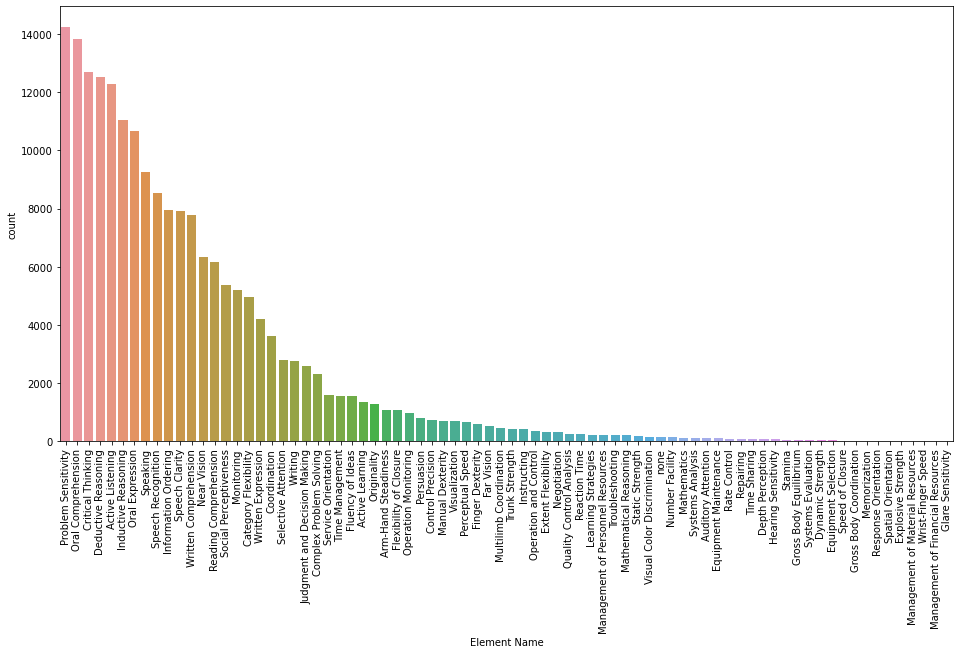

In [49]:
plt.figure(figsize=(16,8))
sns.countplot( x = 'Element Name', data=abi_skills, 
              order = abi_skills['Element Name'].value_counts().index)
locs, labels = plt.xticks()
_ = plt.setp(labels, rotation=90)

In [50]:
(100 * abi_skills['Element Name'].value_counts()/len(abi_skills)).head(40)

Problem Sensitivity             7.279744
Oral Comprehension              7.077316
Critical Thinking               6.490990
Deductive Reasoning             6.403578
Active Listening                6.274760
Inductive Reasoning             5.653163
Oral Expression                 5.448179
Speaking                        4.727412
Speech Recognition              4.358850
Information Ordering            4.063898
Speech Clarity                  4.042939
Written Comprehension           3.978530
Near Vision                     3.233738
Reading Comprehension           3.155527
Social Perceptiveness           2.744537
Monitoring                      2.657125
Category Flexibility            2.542620
Written Expression              2.143387
Coordination                    1.846390
Selective Attention             1.425687
Writing                         1.403195
Judgment and Decision Making    1.326518
Complex Problem Solving         1.174185
Service Orientation             0.808690
Time Management 

In [51]:
skills_counts = abi_skills.groupby('Element Name').nunique()['Title'].sort_values(ascending = False).reset_index(name = 'Count')
skills_counts

,Element Name,Count
0,Critical Thinking,949
1,Active Listening,948
2,Problem Sensitivity,945
3,Oral Comprehension,935
4,Speaking,914
...,...,...
73,Explosive Strength,2
74,Wrist-Finger Speed,2
75,Glare Sensitivity,1
76,Management of Financial Resources,1


In [52]:
skills_counts.head(40)

,Element Name,Count
0,Critical Thinking,949
1,Active Listening,948
2,Problem Sensitivity,945
3,Oral Comprehension,935
4,Speaking,914
5,Near Vision,897
6,Oral Expression,892
7,Deductive Reasoning,868
8,Information Ordering,810
9,Reading Comprehension,786


In [53]:
#skills_counts = skills_counts[skills_counts['Count'] > 300]
#skills_counts = skills_counts[skills_counts['Count'] > 100]
skills_counts = skills_counts[skills_counts['Count'] > 200]
skills_counts

,Element Name,Count
0,Critical Thinking,949
1,Active Listening,948
2,Problem Sensitivity,945
3,Oral Comprehension,935
4,Speaking,914
5,Near Vision,897
6,Oral Expression,892
7,Deductive Reasoning,868
8,Information Ordering,810
9,Reading Comprehension,786


In [54]:
# Filter out the abilities skills that are attached to less than 200 titles
abi_skills = pd.merge(abi_skills, skills_counts, on = ['Element Name'] )
abi_skills

,Title,Element Name,Activities_Context,Description,Major Group,Count
0,Actors,Oral Expression,Getting Information,"Play parts in stage, television, radio, video,...",G27,892
1,Actors,Oral Expression,"Communicating with Supervisors, Peers, or Subo...","Play parts in stage, television, radio, video,...",G27,892
2,Actors,Oral Expression,Establishing and Maintaining Interpersonal Rel...,"Play parts in stage, television, radio, video,...",G27,892
3,Actors,Oral Expression,Communicating with Persons Outside Organization,"Play parts in stage, television, radio, video,...",G27,892
4,Actors,Oral Expression,Interpreting the Meaning of Information for Ot...,"Play parts in stage, television, radio, video,...",G27,892
...,...,...,...,...,...,...
186399,"Railroad Brake, Signal, and Switch Operators",Operation Monitoring,In an Enclosed Vehicle or Equipment,Operate railroad track switches. Couple or unc...,G53,237
186400,Recycling and Reclamation Workers,Operation Monitoring,In an Open Vehicle or Equipment,Prepare and sort materials or products for rec...,G51,237
186401,"Service Unit Operators, Oil, Gas, and Mining",Operation Monitoring,In an Enclosed Vehicle or Equipment,Operate equipment to increase oil flow from pr...,G47,237
186402,Solar Thermal Installers and Technicians,Operation Monitoring,In an Enclosed Vehicle or Equipment,Install or repair solar energy systems designe...,G47,237


In [55]:
abi_skills = abi_skills.drop(columns='Count')
abi_skills

,Title,Element Name,Activities_Context,Description,Major Group
0,Actors,Oral Expression,Getting Information,"Play parts in stage, television, radio, video,...",G27
1,Actors,Oral Expression,"Communicating with Supervisors, Peers, or Subo...","Play parts in stage, television, radio, video,...",G27
2,Actors,Oral Expression,Establishing and Maintaining Interpersonal Rel...,"Play parts in stage, television, radio, video,...",G27
3,Actors,Oral Expression,Communicating with Persons Outside Organization,"Play parts in stage, television, radio, video,...",G27
4,Actors,Oral Expression,Interpreting the Meaning of Information for Ot...,"Play parts in stage, television, radio, video,...",G27
...,...,...,...,...,...
186399,"Railroad Brake, Signal, and Switch Operators",Operation Monitoring,In an Enclosed Vehicle or Equipment,Operate railroad track switches. Couple or unc...,G53
186400,Recycling and Reclamation Workers,Operation Monitoring,In an Open Vehicle or Equipment,Prepare and sort materials or products for rec...,G51
186401,"Service Unit Operators, Oil, Gas, and Mining",Operation Monitoring,In an Enclosed Vehicle or Equipment,Operate equipment to increase oil flow from pr...,G47
186402,Solar Thermal Installers and Technicians,Operation Monitoring,In an Enclosed Vehicle or Equipment,Install or repair solar energy systems designe...,G47


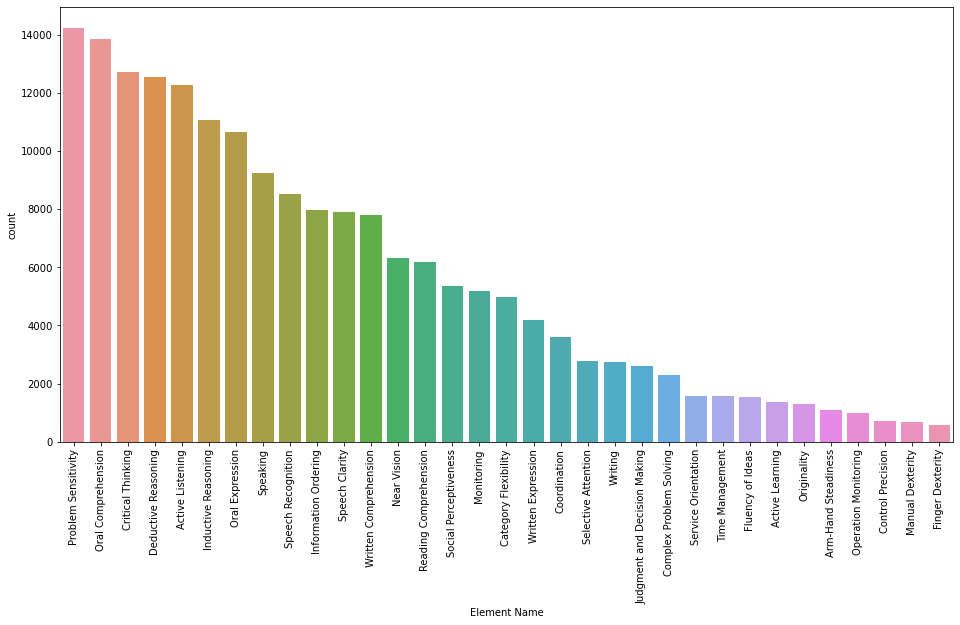

In [56]:
plt.figure(figsize=(16,8))
sns.countplot( x = 'Element Name', data=abi_skills, 
              order = abi_skills['Element Name'].value_counts().index)
locs, labels = plt.xticks()
_ = plt.setp(labels, rotation=90)

#### Exploration analysis of the description and Activities_Context columns
The description will be the main model input. It very limited and linked to the title column. However to build our model we will merge the Activities_context column with the description column.  

<AxesSubplot:>

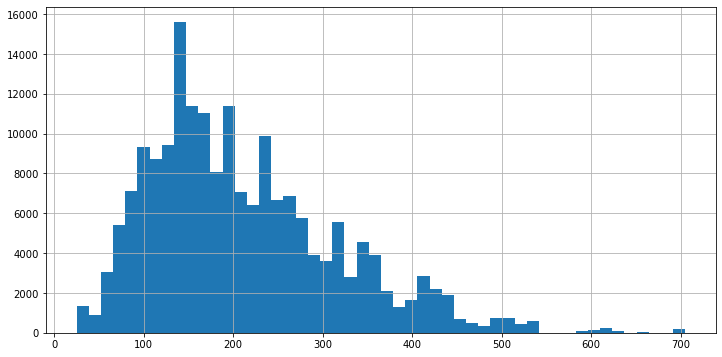

In [57]:
plt.figure(figsize=(12,6))
abi_skills['Description'].str.len().hist(bins=50)


<AxesSubplot:>

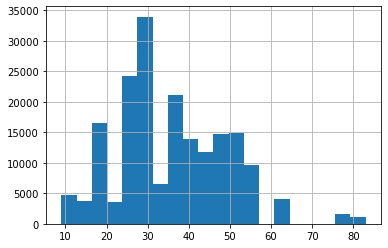

In [58]:
abi_skills['Activities_Context'].str.len().hist(bins=20)

In [59]:
# Merge the Description column with the Activities_Context column
# We will take only the 400 first characters of the description
#abi_skills['Description'] = abi_skills.apply(lambda x : x['Description'] + ' ' + x['Activities_Context'], axis=1)
abi_skills['Description'] = abi_skills.apply(lambda x : x['Description'][:400] + ' ' + x['Activities_Context'], axis=1)

In [60]:
# abi_skills = abi_skills.rename(columns={'Element Name': 'Abilities_Skills'})
# abi_skills

#### Checking Tags dependence

In [61]:
from sklearn.preprocessing import OneHotEncoder

In [62]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(abi_skills['Element Name'].values.reshape(-1, 1))
ab_skills = ohe.transform(abi_skills['Element Name'].values.reshape(-1, 1))
ab_skills

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
ohe.categories_[0]

array(['Active Learning', 'Active Listening', 'Arm-Hand Steadiness',
       'Category Flexibility', 'Complex Problem Solving',
       'Control Precision', 'Coordination', 'Critical Thinking',
       'Deductive Reasoning', 'Finger Dexterity', 'Fluency of Ideas',
       'Inductive Reasoning', 'Information Ordering',
       'Judgment and Decision Making', 'Manual Dexterity', 'Monitoring',
       'Near Vision', 'Operation Monitoring', 'Oral Comprehension',
       'Oral Expression', 'Originality', 'Problem Sensitivity',
       'Reading Comprehension', 'Selective Attention',
       'Service Orientation', 'Social Perceptiveness', 'Speaking',
       'Speech Clarity', 'Speech Recognition', 'Time Management',
       'Writing', 'Written Comprehension', 'Written Expression'],
      dtype=object)

In [64]:
ab_skills = pd.DataFrame(data=ab_skills, columns=ohe.categories_[0].tolist())
ab_skills

,Active Learning,Active Listening,Arm-Hand Steadiness,Category Flexibility,Complex Problem Solving,Control Precision,Coordination,Critical Thinking,Deductive Reasoning,Finger Dexterity,...,Selective Attention,Service Orientation,Social Perceptiveness,Speaking,Speech Clarity,Speech Recognition,Time Management,Writing,Written Comprehension,Written Expression
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


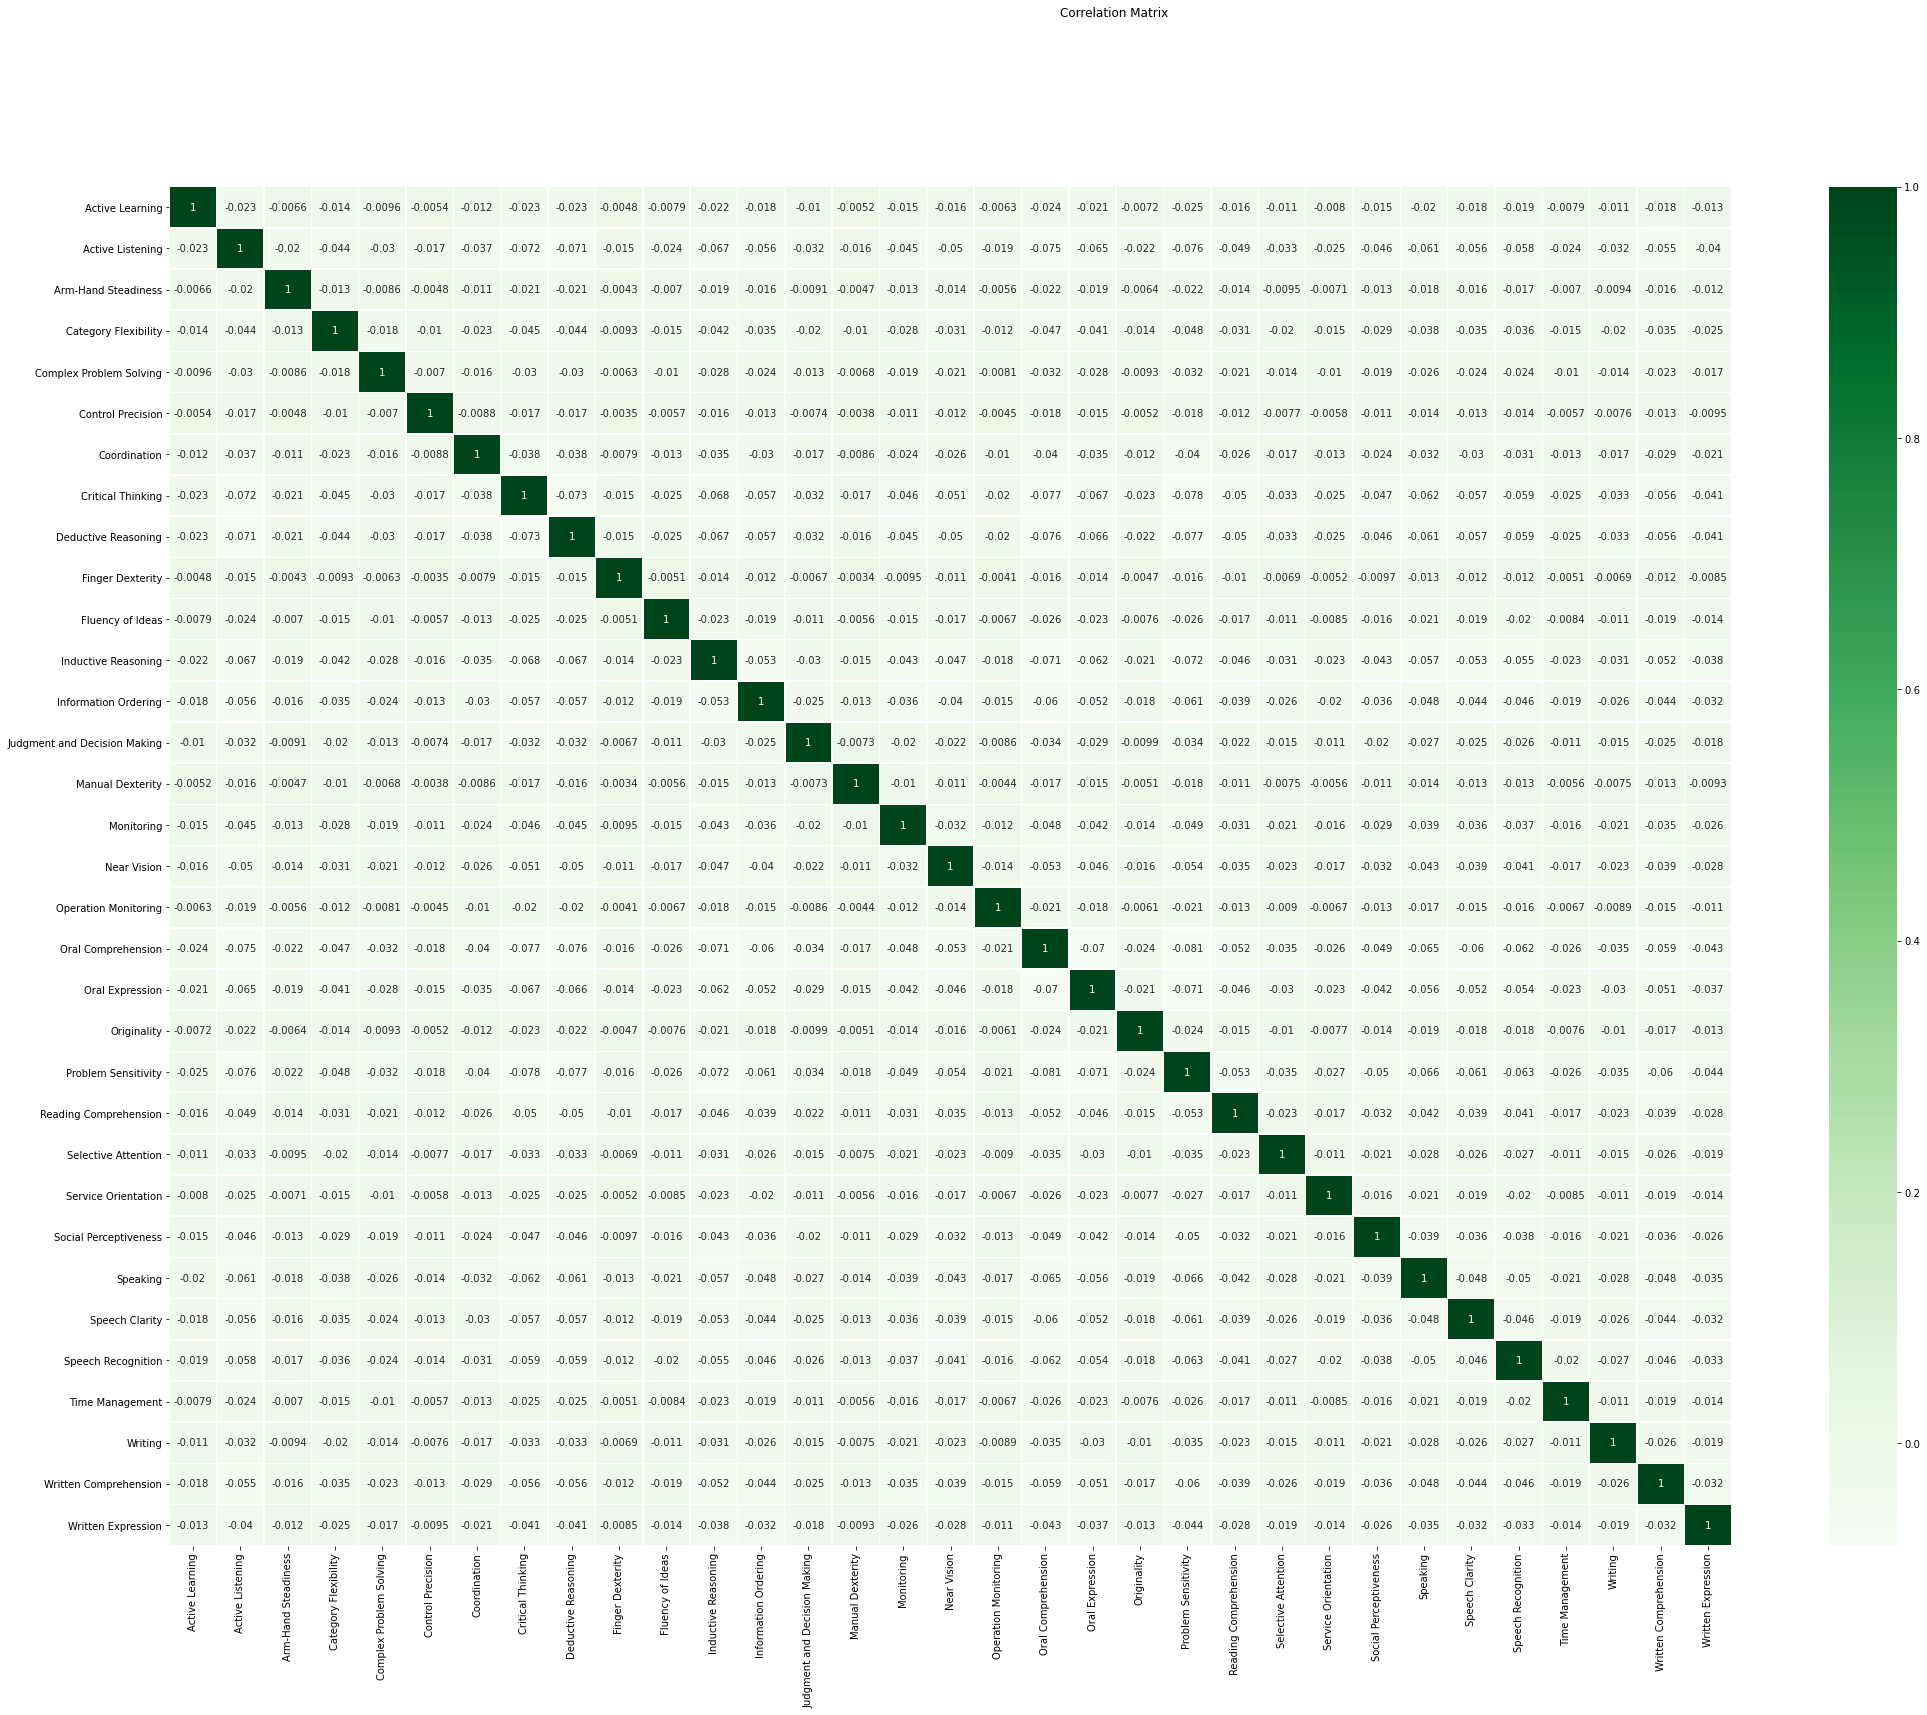

In [65]:
# Heatmap to check if the tags are independent
fig, ax = plt.subplots(figsize=(35, 25))
fig.suptitle('Correlation Matrix')
sns.heatmap(ab_skills.corr(), annot=True, cmap="Greens", linewidths=.5, ax=ax);

We see in the heatmap above that there are not correlation between the tags. 

#### Finish the dataset design
We will finish the dataset design by adding an Abilities_Skills columns that contains the list of Abilities_Skills for each title

In [66]:
l_skills = abi_skills.groupby('Title')['Element Name'].apply(lambda x: list(set(x))).reset_index()
l_skills

,Title,Element Name
0,Accountants,"[Category Flexibility, Speech Recognition, Rea..."
1,Actors,"[Writing, Problem Sensitivity, Written Express..."
2,Actuaries,"[Speech Clarity, Category Flexibility, Reading..."
3,Acupuncturists,"[Writing, Problem Sensitivity, Arm-Hand Steadi..."
4,Acute Care Nurses,"[Problem Sensitivity, Written Expression, Dedu..."
...,...,...
963,Wind Energy Project Managers,"[Writing, Problem Sensitivity, Written Express..."
964,Wind Turbine Service Technicians,"[Reading Comprehension, Problem Sensitivity, M..."
965,"Woodworking Machine Setters, Operators, and Te...","[Problem Sensitivity, Monitoring, Arm-Hand Ste..."
966,Word Processors and Typists,"[Writing, Problem Sensitivity, Written Express..."


In [67]:
l_skills =l_skills.rename(columns={'Element Name': 'Abilities_Skills'})
l_skills 

,Title,Abilities_Skills
0,Accountants,"[Category Flexibility, Speech Recognition, Rea..."
1,Actors,"[Writing, Problem Sensitivity, Written Express..."
2,Actuaries,"[Speech Clarity, Category Flexibility, Reading..."
3,Acupuncturists,"[Writing, Problem Sensitivity, Arm-Hand Steadi..."
4,Acute Care Nurses,"[Problem Sensitivity, Written Expression, Dedu..."
...,...,...
963,Wind Energy Project Managers,"[Writing, Problem Sensitivity, Written Express..."
964,Wind Turbine Service Technicians,"[Reading Comprehension, Problem Sensitivity, M..."
965,"Woodworking Machine Setters, Operators, and Te...","[Problem Sensitivity, Monitoring, Arm-Hand Ste..."
966,Word Processors and Typists,"[Writing, Problem Sensitivity, Written Express..."


In [68]:
abi_skills = pd.merge(abi_skills, l_skills, on= ['Title'] )
abi_skills

,Title,Element Name,Activities_Context,Description,Major Group,Abilities_Skills
0,Actors,Oral Expression,Getting Information,"Play parts in stage, television, radio, video,...",G27,"[Writing, Problem Sensitivity, Written Express..."
1,Actors,Oral Expression,"Communicating with Supervisors, Peers, or Subo...","Play parts in stage, television, radio, video,...",G27,"[Writing, Problem Sensitivity, Written Express..."
2,Actors,Oral Expression,Establishing and Maintaining Interpersonal Rel...,"Play parts in stage, television, radio, video,...",G27,"[Writing, Problem Sensitivity, Written Express..."
3,Actors,Oral Expression,Communicating with Persons Outside Organization,"Play parts in stage, television, radio, video,...",G27,"[Writing, Problem Sensitivity, Written Express..."
4,Actors,Oral Expression,Interpreting the Meaning of Information for Ot...,"Play parts in stage, television, radio, video,...",G27,"[Writing, Problem Sensitivity, Written Express..."
...,...,...,...,...,...,...
186399,Fishers and Related Fishing Workers,Judgment and Decision Making,Impact of Decisions on Co-workers or Company R...,"Use nets, fishing rods, traps, or other equipm...",G45,"[Arm-Hand Steadiness, Speaking, Manual Dexteri..."
186400,Fishers and Related Fishing Workers,Arm-Hand Steadiness,"Spend Time Using Your Hands to Handle, Control...","Use nets, fishing rods, traps, or other equipm...",G45,"[Arm-Hand Steadiness, Speaking, Manual Dexteri..."
186401,Fishers and Related Fishing Workers,Manual Dexterity,"Spend Time Using Your Hands to Handle, Control...","Use nets, fishing rods, traps, or other equipm...",G45,"[Arm-Hand Steadiness, Speaking, Manual Dexteri..."
186402,Fishers and Related Fishing Workers,Control Precision,"Spend Time Using Your Hands to Handle, Control...","Use nets, fishing rods, traps, or other equipm...",G45,"[Arm-Hand Steadiness, Speaking, Manual Dexteri..."


In [69]:
abi_skills[abi_skills['Title'] == 'Computer Numerically Controlled Machine Tool Programmers, Metal and Plastic']

,Title,Element Name,Activities_Context,Description,Major Group,Abilities_Skills
183527,Computer Numerically Controlled Machine Tool P...,Oral Comprehension,Contact With Others,Develop programs to control machining or proce...,G51,"[Category Flexibility, Reading Comprehension, ..."
183528,Computer Numerically Controlled Machine Tool P...,Oral Comprehension,Face-to-Face Discussions,Develop programs to control machining or proce...,G51,"[Category Flexibility, Reading Comprehension, ..."
183529,Computer Numerically Controlled Machine Tool P...,Oral Comprehension,Work With Work Group or Team,Develop programs to control machining or proce...,G51,"[Category Flexibility, Reading Comprehension, ..."
183530,Computer Numerically Controlled Machine Tool P...,Oral Comprehension,Responsibility for Outcomes and Results,Develop programs to control machining or proce...,G51,"[Category Flexibility, Reading Comprehension, ..."
183531,Computer Numerically Controlled Machine Tool P...,Oral Comprehension,Coordinate or Lead Others,Develop programs to control machining or proce...,G51,"[Category Flexibility, Reading Comprehension, ..."
183532,Computer Numerically Controlled Machine Tool P...,Written Comprehension,Electronic Mail,Develop programs to control machining or proce...,G51,"[Category Flexibility, Reading Comprehension, ..."
183533,Computer Numerically Controlled Machine Tool P...,Near Vision,Electronic Mail,Develop programs to control machining or proce...,G51,"[Category Flexibility, Reading Comprehension, ..."
183534,Computer Numerically Controlled Machine Tool P...,Near Vision,Exposed to Hazardous Equipment,Develop programs to control machining or proce...,G51,"[Category Flexibility, Reading Comprehension, ..."
183535,Computer Numerically Controlled Machine Tool P...,Problem Sensitivity,Structured versus Unstructured Work,Develop programs to control machining or proce...,G51,"[Category Flexibility, Reading Comprehension, ..."
183536,Computer Numerically Controlled Machine Tool P...,Problem Sensitivity,Face-to-Face Discussions,Develop programs to control machining or proce...,G51,"[Category Flexibility, Reading Comprehension, ..."


In [70]:
abi_skills = abi_skills.drop(columns='Element Name')
abi_skills

,Title,Activities_Context,Description,Major Group,Abilities_Skills
0,Actors,Getting Information,"Play parts in stage, television, radio, video,...",G27,"[Writing, Problem Sensitivity, Written Express..."
1,Actors,"Communicating with Supervisors, Peers, or Subo...","Play parts in stage, television, radio, video,...",G27,"[Writing, Problem Sensitivity, Written Express..."
2,Actors,Establishing and Maintaining Interpersonal Rel...,"Play parts in stage, television, radio, video,...",G27,"[Writing, Problem Sensitivity, Written Express..."
3,Actors,Communicating with Persons Outside Organization,"Play parts in stage, television, radio, video,...",G27,"[Writing, Problem Sensitivity, Written Express..."
4,Actors,Interpreting the Meaning of Information for Ot...,"Play parts in stage, television, radio, video,...",G27,"[Writing, Problem Sensitivity, Written Express..."
...,...,...,...,...,...
186399,Fishers and Related Fishing Workers,Impact of Decisions on Co-workers or Company R...,"Use nets, fishing rods, traps, or other equipm...",G45,"[Arm-Hand Steadiness, Speaking, Manual Dexteri..."
186400,Fishers and Related Fishing Workers,"Spend Time Using Your Hands to Handle, Control...","Use nets, fishing rods, traps, or other equipm...",G45,"[Arm-Hand Steadiness, Speaking, Manual Dexteri..."
186401,Fishers and Related Fishing Workers,"Spend Time Using Your Hands to Handle, Control...","Use nets, fishing rods, traps, or other equipm...",G45,"[Arm-Hand Steadiness, Speaking, Manual Dexteri..."
186402,Fishers and Related Fishing Workers,"Spend Time Using Your Hands to Handle, Control...","Use nets, fishing rods, traps, or other equipm...",G45,"[Arm-Hand Steadiness, Speaking, Manual Dexteri..."


In [71]:
# abi_skills = abi_skills.rename(columns={'List_Skills' : 'Abilities_Skills'})
# abi_skills

In [72]:
abi_skills[abi_skills['Title'] == 'Computer Numerically Controlled Machine Tool Programmers, Metal and Plastic']

,Title,Activities_Context,Description,Major Group,Abilities_Skills
183527,Computer Numerically Controlled Machine Tool P...,Contact With Others,Develop programs to control machining or proce...,G51,"[Category Flexibility, Reading Comprehension, ..."
183528,Computer Numerically Controlled Machine Tool P...,Face-to-Face Discussions,Develop programs to control machining or proce...,G51,"[Category Flexibility, Reading Comprehension, ..."
183529,Computer Numerically Controlled Machine Tool P...,Work With Work Group or Team,Develop programs to control machining or proce...,G51,"[Category Flexibility, Reading Comprehension, ..."
183530,Computer Numerically Controlled Machine Tool P...,Responsibility for Outcomes and Results,Develop programs to control machining or proce...,G51,"[Category Flexibility, Reading Comprehension, ..."
183531,Computer Numerically Controlled Machine Tool P...,Coordinate or Lead Others,Develop programs to control machining or proce...,G51,"[Category Flexibility, Reading Comprehension, ..."
183532,Computer Numerically Controlled Machine Tool P...,Electronic Mail,Develop programs to control machining or proce...,G51,"[Category Flexibility, Reading Comprehension, ..."
183533,Computer Numerically Controlled Machine Tool P...,Electronic Mail,Develop programs to control machining or proce...,G51,"[Category Flexibility, Reading Comprehension, ..."
183534,Computer Numerically Controlled Machine Tool P...,Exposed to Hazardous Equipment,Develop programs to control machining or proce...,G51,"[Category Flexibility, Reading Comprehension, ..."
183535,Computer Numerically Controlled Machine Tool P...,Structured versus Unstructured Work,Develop programs to control machining or proce...,G51,"[Category Flexibility, Reading Comprehension, ..."
183536,Computer Numerically Controlled Machine Tool P...,Face-to-Face Discussions,Develop programs to control machining or proce...,G51,"[Category Flexibility, Reading Comprehension, ..."


In [73]:
abi_skills = abi_skills.drop_duplicates(subset=['Title', 'Activities_Context'], ignore_index=True)
abi_skills

,Title,Activities_Context,Description,Major Group,Abilities_Skills
0,Actors,Getting Information,"Play parts in stage, television, radio, video,...",G27,"[Writing, Problem Sensitivity, Written Express..."
1,Actors,"Communicating with Supervisors, Peers, or Subo...","Play parts in stage, television, radio, video,...",G27,"[Writing, Problem Sensitivity, Written Express..."
2,Actors,Establishing and Maintaining Interpersonal Rel...,"Play parts in stage, television, radio, video,...",G27,"[Writing, Problem Sensitivity, Written Express..."
3,Actors,Communicating with Persons Outside Organization,"Play parts in stage, television, radio, video,...",G27,"[Writing, Problem Sensitivity, Written Express..."
4,Actors,Interpreting the Meaning of Information for Ot...,"Play parts in stage, television, radio, video,...",G27,"[Writing, Problem Sensitivity, Written Express..."
...,...,...,...,...,...
26177,Fishers and Related Fishing Workers,Structured versus Unstructured Work,"Use nets, fishing rods, traps, or other equipm...",G45,"[Arm-Hand Steadiness, Speaking, Manual Dexteri..."
26178,Fishers and Related Fishing Workers,Freedom to Make Decisions,"Use nets, fishing rods, traps, or other equipm...",G45,"[Arm-Hand Steadiness, Speaking, Manual Dexteri..."
26179,Fishers and Related Fishing Workers,Impact of Decisions on Co-workers or Company R...,"Use nets, fishing rods, traps, or other equipm...",G45,"[Arm-Hand Steadiness, Speaking, Manual Dexteri..."
26180,Fishers and Related Fishing Workers,Level of Competition,"Use nets, fishing rods, traps, or other equipm...",G45,"[Arm-Hand Steadiness, Speaking, Manual Dexteri..."


In [74]:
abi_skills[abi_skills['Title'] == 'Computer Numerically Controlled Machine Tool Programmers, Metal and Plastic']

,Title,Activities_Context,Description,Major Group,Abilities_Skills
25466,Computer Numerically Controlled Machine Tool P...,Contact With Others,Develop programs to control machining or proce...,G51,"[Category Flexibility, Reading Comprehension, ..."
25467,Computer Numerically Controlled Machine Tool P...,Face-to-Face Discussions,Develop programs to control machining or proce...,G51,"[Category Flexibility, Reading Comprehension, ..."
25468,Computer Numerically Controlled Machine Tool P...,Work With Work Group or Team,Develop programs to control machining or proce...,G51,"[Category Flexibility, Reading Comprehension, ..."
25469,Computer Numerically Controlled Machine Tool P...,Responsibility for Outcomes and Results,Develop programs to control machining or proce...,G51,"[Category Flexibility, Reading Comprehension, ..."
25470,Computer Numerically Controlled Machine Tool P...,Coordinate or Lead Others,Develop programs to control machining or proce...,G51,"[Category Flexibility, Reading Comprehension, ..."
25471,Computer Numerically Controlled Machine Tool P...,Electronic Mail,Develop programs to control machining or proce...,G51,"[Category Flexibility, Reading Comprehension, ..."
25472,Computer Numerically Controlled Machine Tool P...,Exposed to Hazardous Equipment,Develop programs to control machining or proce...,G51,"[Category Flexibility, Reading Comprehension, ..."
25473,Computer Numerically Controlled Machine Tool P...,Structured versus Unstructured Work,Develop programs to control machining or proce...,G51,"[Category Flexibility, Reading Comprehension, ..."
25474,Computer Numerically Controlled Machine Tool P...,Freedom to Make Decisions,Develop programs to control machining or proce...,G51,"[Category Flexibility, Reading Comprehension, ..."
25475,Computer Numerically Controlled Machine Tool P...,Impact of Decisions on Co-workers or Company R...,Develop programs to control machining or proce...,G51,"[Category Flexibility, Reading Comprehension, ..."


In [75]:
abi_skills

,Title,Activities_Context,Description,Major Group,Abilities_Skills
0,Actors,Getting Information,"Play parts in stage, television, radio, video,...",G27,"[Writing, Problem Sensitivity, Written Express..."
1,Actors,"Communicating with Supervisors, Peers, or Subo...","Play parts in stage, television, radio, video,...",G27,"[Writing, Problem Sensitivity, Written Express..."
2,Actors,Establishing and Maintaining Interpersonal Rel...,"Play parts in stage, television, radio, video,...",G27,"[Writing, Problem Sensitivity, Written Express..."
3,Actors,Communicating with Persons Outside Organization,"Play parts in stage, television, radio, video,...",G27,"[Writing, Problem Sensitivity, Written Express..."
4,Actors,Interpreting the Meaning of Information for Ot...,"Play parts in stage, television, radio, video,...",G27,"[Writing, Problem Sensitivity, Written Express..."
...,...,...,...,...,...
26177,Fishers and Related Fishing Workers,Structured versus Unstructured Work,"Use nets, fishing rods, traps, or other equipm...",G45,"[Arm-Hand Steadiness, Speaking, Manual Dexteri..."
26178,Fishers and Related Fishing Workers,Freedom to Make Decisions,"Use nets, fishing rods, traps, or other equipm...",G45,"[Arm-Hand Steadiness, Speaking, Manual Dexteri..."
26179,Fishers and Related Fishing Workers,Impact of Decisions on Co-workers or Company R...,"Use nets, fishing rods, traps, or other equipm...",G45,"[Arm-Hand Steadiness, Speaking, Manual Dexteri..."
26180,Fishers and Related Fishing Workers,Level of Competition,"Use nets, fishing rods, traps, or other equipm...",G45,"[Arm-Hand Steadiness, Speaking, Manual Dexteri..."


## Text classification with Keras functional model
Now that we have a dataset, we will build our multi-class, multi-label classification model using NLP, and a Keras deep learning model. 

In [76]:
import tensorflow as tf
from tensorflow import keras

In [77]:
import re

def clean_text(x):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern, '', x)
    return text

def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}', '#####', x)
        x = re.sub('[0-9]{4}', '####', x)
        x = re.sub('[0-9]{3}', '###', x)
        x = re.sub('[0-9]{2}', '##', x)
    return x

In [85]:
# Clean the text
abi_skills.loc[:,'Description'] = abi_skills['Description'].apply(lambda x: clean_text(x))
# Clean numbers
abi_skills.loc[:,'Description'] = abi_skills['Description'].apply(lambda x: clean_numbers(x))


C:\Users\jose\anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


#### Loading Keras and SKlearn modules

In [86]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [87]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

In [88]:
# Create train and test sets
# x_train, x_test: 'Description'
# y_train1, y_test1: 'Title'
x_train, x_test, y_train1, y_test1 = train_test_split(abi_skills['Description'], abi_skills['Title'],
                                                    stratify=abi_skills['Major Group'], random_state=123, 
                                                    test_size=0.1)
                                                    #test_size=0.20)

In [89]:
abi_skills['Description'].str.len().sort_values(ascending=False).head(10000)

18793    477
18782    475
14747    473
19842    473
11829    472
        ... 
3537     247
22523    247
24786    247
8019     247
20018    247
Name: Description, Length: 10000, dtype: int64

In [90]:
# Fit the tokenizer on the x_train df
#maxlen = 500 
maxlen = 477
#maxlen = 200
#maxlen = 100   
# Max number of words to be added in the tokenizer                      
max_words = 10000                                     

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts( list(x_train.values))

In [91]:
x_train[::1000]

1313     Assess and treat persons with hearing and rela...
1577     Handle baggage for travelers at transportation...
15512    Provide social services to assist in rehabilit...
23951    Adjust and operate surveying instruments such ...
10480    Care for ill injured or convalescing patients ...
19528    Plan and sell transportation and accommodation...
53       Analyze statistical data such as mortality acc...
18189    Operate or maintain stationary engines boilers...
9759     Apply insulating materials to pipes or ductwor...
6229     Research design plan or perform engineering du...
17368    Clean and repair septic tanks sewer lines or d...
9213     Repair adjust or install all types of electric...
14421    Record drugs delivered to the pharmacy store i...
7437     Scrape and sand wooden floors to smooth surfac...
11881    Perform complex medical laboratory tests for d...
15627    Read transcript or proof type setup to detect ...
12828    Conduct electroneurodiagnostic END tests such .

In [92]:
# Build y_train2 and y_test2 using the same index as y_train1 and 
y_train2 = abi_skills['Abilities_Skills'].reindex_like(y_train1)
y_test2 = abi_skills['Abilities_Skills'].reindex_like(y_test1)

In [94]:
print("Train shape : ",x_train.shape)
print("Val shape : ",x_test.shape)

Train shape :  (23563,)
Val shape :  (2619,)


In [95]:
# y_train1: Use One Hot encoding to encode the Titles
# Fit the ohe on y_train1
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
# y_train2: Use the sk-learn multilabelbinarizer to encode the tags
# Fit the mlb on y_train2
mlb = MultiLabelBinarizer()
ohe.fit(y_train1.values.reshape(-1, 1))
mlb.fit(y_train2.values.tolist())

MultiLabelBinarizer()

In [96]:
y_test1[:70]

4236                                    Cooks, Short Order
19990    Weighers, Measurers, Checkers, and Samplers, R...
18825                                    Technical Writers
307      Agents and Business Managers of Artists, Perfo...
12726                                              Nannies
                               ...                        
730                            Anesthesiologist Assistants
18139                 Speech-Language Pathology Assistants
732                            Anesthesiologist Assistants
17212    Secretaries and Administrative Assistants, Exc...
7860                                             Foresters
Name: Title, Length: 70, dtype: object

### Description feature Text Embedding

In [97]:
# Encoding the description 
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

## Pad the sentences 
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post')


word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


Found 4672 unique tokens.


In [98]:
x_test[::1000]

array([[  45,    1,  958, ...,    0,    0,    0],
       [  36,  393,  338, ...,    0,    0,    0],
       [  58,    1, 3644, ...,    0,    0,    0]])

In [99]:
# Transform y_train1, y_test1
y_train1 = ohe.transform(y_train1.values.reshape(-1, 1))
y_test1 = ohe.transform(y_test1.values.reshape(-1, 1))

In [101]:
ohe.inverse_transform(y_test1[0].reshape(1,-1))

array([['Cooks, Short Order']], dtype=object)

In [102]:
y_test1.shape

(2619, 968)

In [103]:
ohe.inverse_transform(y_test1[0].reshape(1,-1))

array([['Cooks, Short Order']], dtype=object)

In [104]:
y_train2.values[0]

['Writing',
 'Problem Sensitivity',
 'Written Expression',
 'Deductive Reasoning',
 'Written Comprehension',
 'Near Vision',
 'Reading Comprehension',
 'Active Listening',
 'Judgment and Decision Making',
 'Speech Recognition',
 'Monitoring',
 'Social Perceptiveness',
 'Speaking',
 'Coordination',
 'Critical Thinking',
 'Oral Comprehension',
 'Finger Dexterity',
 'Information Ordering',
 'Speech Clarity',
 'Category Flexibility',
 'Oral Expression',
 'Active Learning',
 'Inductive Reasoning']

In [105]:
len(mlb.classes_)

33

In [106]:
y_train2 = mlb.transform(y_train2.values.tolist())
y_test2 = mlb.transform(y_test2.values.tolist())

In [107]:
len(ohe.categories_[0])

968

In [108]:
mlb.classes_

array(['Active Learning', 'Active Listening', 'Arm-Hand Steadiness',
       'Category Flexibility', 'Complex Problem Solving',
       'Control Precision', 'Coordination', 'Critical Thinking',
       'Deductive Reasoning', 'Finger Dexterity', 'Fluency of Ideas',
       'Inductive Reasoning', 'Information Ordering',
       'Judgment and Decision Making', 'Manual Dexterity', 'Monitoring',
       'Near Vision', 'Operation Monitoring', 'Oral Comprehension',
       'Oral Expression', 'Originality', 'Problem Sensitivity',
       'Reading Comprehension', 'Selective Attention',
       'Service Orientation', 'Social Perceptiveness', 'Speaking',
       'Speech Clarity', 'Speech Recognition', 'Time Management',
       'Writing', 'Written Comprehension', 'Written Expression'],
      dtype=object)

In [109]:
y_train2[0]

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1])

In [110]:
mlb.inverse_transform(y_train2[0].reshape(1,-1))

[('Active Learning',
  'Active Listening',
  'Category Flexibility',
  'Coordination',
  'Critical Thinking',
  'Deductive Reasoning',
  'Finger Dexterity',
  'Inductive Reasoning',
  'Information Ordering',
  'Judgment and Decision Making',
  'Monitoring',
  'Near Vision',
  'Oral Comprehension',
  'Oral Expression',
  'Problem Sensitivity',
  'Reading Comprehension',
  'Social Perceptiveness',
  'Speaking',
  'Speech Clarity',
  'Speech Recognition',
  'Writing',
  'Written Comprehension',
  'Written Expression')]

In [111]:
y_test2[0]

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0])

In [112]:
mlb.inverse_transform(y_test2[0].reshape(1,-1))

[('Active Learning',
  'Active Listening',
  'Arm-Hand Steadiness',
  'Control Precision',
  'Coordination',
  'Critical Thinking',
  'Finger Dexterity',
  'Information Ordering',
  'Manual Dexterity',
  'Monitoring',
  'Near Vision',
  'Oral Comprehension',
  'Oral Expression',
  'Problem Sensitivity',
  'Reading Comprehension',
  'Selective Attention',
  'Service Orientation',
  'Social Perceptiveness',
  'Speaking',
  'Speech Clarity',
  'Speech Recognition',
  'Time Management',
  'Written Comprehension')]

In [113]:
# Dump The Title and Label encoder for future use in the App
import joblib
joblib.dump(ohe, 'TitleLabelEncoder.joblib')
joblib.dump(mlb, 'MultiLabelEncoder.joblib')

['MultiLabelEncoder.joblib']

In [114]:
# Dump The tokenizer for future use in the App
joblib.dump(tokenizer, 'DescTokenizer.joblib')

['DescTokenizer.joblib']

In [115]:
# Load the Glove pre-trained embeddings
glove_dir = 'glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding = 'utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [116]:
# Build the embedding matrix
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector  

In [117]:
np.shape(embedding_matrix)

(10000, 100)

### Neural Network

In [118]:

input_ = keras.layers.Input(shape=x_train.shape[1:])
embedding_layer = keras.layers.Embedding(max_words, 100, weights=[embedding_matrix], trainable=False)(input_)
flat = keras.layers.Flatten() (embedding_layer)

hidden1 = keras.layers.Dense(8, activation="relu")(flat)
output1 = keras.layers.Dense(len(ohe.categories_[0]), activation='softmax')(hidden1)

hidden2 = keras.layers.Dense(32, activation="relu")(flat)
output2 = keras.layers.Dense(len(mlb.classes_), activation='sigmoid')(hidden2)

model = keras.models.Model(inputs=input_, outputs=[output1, output2])

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 477)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 477, 100)     1000000     input_1[0][0]                    
__________________________________________________________________________________________________
flatten (Flatten)               (None, 47700)        0           embedding[0][0]                  
__________________________________________________________________________________________________
dense (Dense)                   (None, 8)            381608      flatten[0][0]                    
_______________________________________________________________________________________

In [119]:
from tensorflow.keras.utils import plot_model

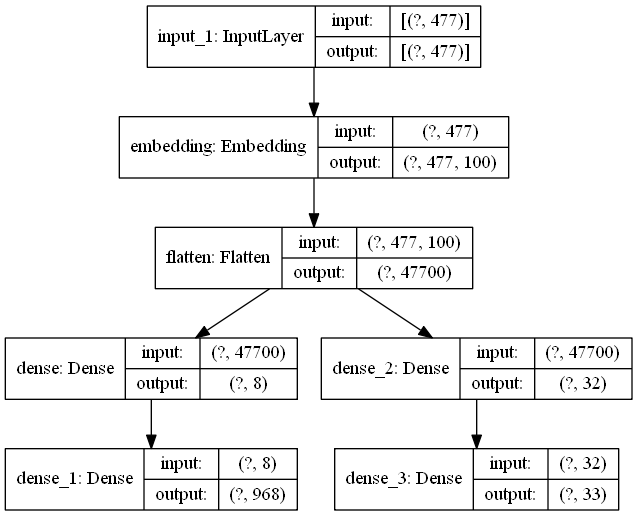

In [120]:
plot_model(model, to_file = 'model_complete.png', show_shapes = True, show_layer_names = True)

In [121]:
from tensorflow.keras.callbacks import EarlyStopping

In [123]:
#instantiate an early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=4)

In [124]:
model.compile(optimizer= 'rmsprop' ,                #optimizer='adam',
              #loss='binary_crossentropy',
              #loss=['sparse_categorical_crossentropy','binary_crossentropy'],
              loss=['categorical_crossentropy','binary_crossentropy'],
              metrics=['acc'])
history = model.fit(x_train, [y_train1, y_train2],
                    epochs=20,                 
                    batch_size=32,
                    validation_split=0.2,
                    #validation_data=(x_val, [y_val1, y_val2]),
                    callbacks=[early_stopping])
#model.save_weights('pre_trained_glove_model_abilities.h5')

Epoch 1/20
590/590 [==============================] - 11s 18ms/step - loss: 5.8945 - dense_1_loss: 5.6628 - dense_3_loss: 0.2317 - dense_1_acc: 0.0849 - dense_3_acc: 0.1520 - val_loss: 4.4402 - val_dense_1_loss: 4.3163 - val_dense_3_loss: 0.1239 - val_dense_1_acc: 0.2328 - val_dense_3_acc: 0.0668
Epoch 2/20
590/590 [==============================] - 10s 18ms/step - loss: 3.2714 - dense_1_loss: 3.1970 - dense_3_loss: 0.0744 - dense_1_acc: 0.4133 - dense_3_acc: 0.0895 - val_loss: 2.6108 - val_dense_1_loss: 2.5496 - val_dense_3_loss: 0.0612 - val_dense_1_acc: 0.5527 - val_dense_3_acc: 0.1816
Epoch 3/20
590/590 [==============================] - 10s 18ms/step - loss: 1.7793 - dense_1_loss: 1.7471 - dense_3_loss: 0.0321 - dense_1_acc: 0.6794 - dense_3_acc: 0.1080 - val_loss: 1.4616 - val_dense_1_loss: 1.4310 - val_dense_3_loss: 0.0306 - val_dense_1_acc: 0.7223 - val_dense_3_acc: 0.0968
Epoch 4/20
590/590 [==============================] - 11s 18ms/step - loss: 1.0164 - dense_1_loss: 0.9997 

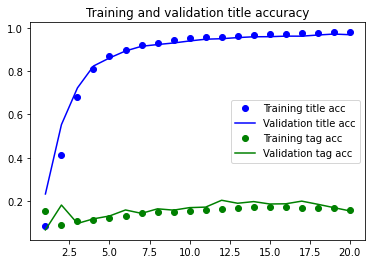

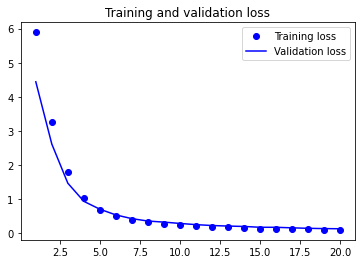

In [125]:
acc_title = history.history['dense_1_acc']
val_acc_title = history.history['val_dense_1_acc']
acc_tag = history.history['dense_3_acc']
val_acc_tag = history.history['val_dense_3_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc_title) + 1)

plt.plot(epochs, acc_title, 'bo', label='Training title acc')
plt.plot(epochs, val_acc_title, 'b', label='Validation title acc')
plt.title('Training and validation title accuracy')
plt.plot(epochs, acc_tag, 'bo', color='green', label='Training tag acc')
plt.plot(epochs, val_acc_tag, 'b', color='green', label='Validation tag acc')
plt.title('Training and validation title accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Model evaluation on the test set

In [126]:
model.evaluate(x_test, [y_test1, y_test2], verbose = 1)

82/82 [==============================] - 0s 4ms/step - loss: 0.1184 - dense_1_loss: 0.1176 - dense_3_loss: 7.7699e-04 - dense_1_acc: 0.9695 - dense_3_acc: 0.1573


[0.11836492270231247,
 0.11758793145418167,
 0.0007769864168949425,
 0.9694539904594421,
 0.15731194615364075]

In [127]:
x_test[::1000]

array([[  45,    1,  958, ...,    0,    0,    0],
       [  36,  393,  338, ...,    0,    0,    0],
       [  58,    1, 3644, ...,    0,    0,    0]])

In [128]:
y_proba = model.predict(x_test[::1000] )

In [129]:
index_word = { v:k for k,v in word_index.items() }

In [132]:
for i,v in enumerate(x_test[::1000]):
    print(i*1000, v)

0 [  45    1  958    4  307   14  103    3  636   68  993  909   14 3329
  525  128    8  372  247   54   67    1  425  220   70 3330    2  569
  118  119    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    

In [134]:
for i,v in enumerate(x_test[::1000]):
    print(' '.join( index_word[id] for id in v if id > 0))

prepare and cook to order a variety of foods that require only a short preparation time may take orders from customers and serve patrons at counters or tables facetoface discussions
design measure fit and adapt lenses and frames for client according to written optical prescription or specification assist client with inserting removing and caring for contact lenses assist client with selecting frames measure customer for size of eyeglasses and coordinate frames with facial and eye measurements and optical prescription prepare work order for optical laboratory containi physical proximity
make and confirm reservations for transportation or lodging or sell transportation tickets may check baggage and direct passengers to designated concourse pier or track deliver tickets contact individuals and groups to inform them of package tours or provide tourists with travel or transportation information deal with external customers


In [136]:
ohe.inverse_transform(y_test1[::1000])

array([['Cooks, Short Order'],
       ['Opticians, Dispensing'],
       ['Reservation and Transportation Ticket Agents and Travel Clerks']],
      dtype=object)

In [137]:
ohe.inverse_transform(y_proba[0])

array([['Cooks, Short Order'],
       ['Opticians, Dispensing'],
       ['Reservation and Transportation Ticket Agents and Travel Clerks']],
      dtype=object)

In [139]:
mlb.inverse_transform(y_test2[::1000])

[('Active Learning',
  'Active Listening',
  'Arm-Hand Steadiness',
  'Control Precision',
  'Coordination',
  'Critical Thinking',
  'Finger Dexterity',
  'Information Ordering',
  'Manual Dexterity',
  'Monitoring',
  'Near Vision',
  'Oral Comprehension',
  'Oral Expression',
  'Problem Sensitivity',
  'Reading Comprehension',
  'Selective Attention',
  'Service Orientation',
  'Social Perceptiveness',
  'Speaking',
  'Speech Clarity',
  'Speech Recognition',
  'Time Management',
  'Written Comprehension'),
 ('Active Learning',
  'Active Listening',
  'Arm-Hand Steadiness',
  'Category Flexibility',
  'Critical Thinking',
  'Deductive Reasoning',
  'Finger Dexterity',
  'Fluency of Ideas',
  'Information Ordering',
  'Judgment and Decision Making',
  'Manual Dexterity',
  'Near Vision',
  'Oral Comprehension',
  'Oral Expression',
  'Problem Sensitivity',
  'Reading Comprehension',
  'Service Orientation',
  'Social Perceptiveness',
  'Speaking',
  'Speech Clarity',
  'Speech Recogn

In [140]:
mlb.inverse_transform(np.round(y_proba[1], decimals=0))

[('Active Learning',
  'Active Listening',
  'Arm-Hand Steadiness',
  'Control Precision',
  'Coordination',
  'Critical Thinking',
  'Finger Dexterity',
  'Information Ordering',
  'Manual Dexterity',
  'Monitoring',
  'Near Vision',
  'Oral Comprehension',
  'Oral Expression',
  'Problem Sensitivity',
  'Reading Comprehension',
  'Selective Attention',
  'Service Orientation',
  'Social Perceptiveness',
  'Speaking',
  'Speech Clarity',
  'Speech Recognition',
  'Time Management',
  'Written Comprehension'),
 ('Active Learning',
  'Active Listening',
  'Arm-Hand Steadiness',
  'Category Flexibility',
  'Critical Thinking',
  'Deductive Reasoning',
  'Finger Dexterity',
  'Fluency of Ideas',
  'Information Ordering',
  'Judgment and Decision Making',
  'Manual Dexterity',
  'Near Vision',
  'Oral Comprehension',
  'Oral Expression',
  'Problem Sensitivity',
  'Reading Comprehension',
  'Service Orientation',
  'Social Perceptiveness',
  'Speaking',
  'Speech Clarity',
  'Speech Recogn

### Test with the occupadion data without skills

In [141]:
df['Occupation_Data']

,O*NET-SOC Code,Title,Description,Major Group
0,11-1011.00,Chief Executives,Determine and formulate policies and provide o...,G11
1,11-1011.03,Chief Sustainability Officers,"Communicate and coordinate with management, sh...",G11
2,11-1021.00,General and Operations Managers,"Plan, direct, or coordinate the operations of ...",G11
3,11-1031.00,Legislators,"Develop, introduce or enact laws and statutes ...",G11
4,11-2011.00,Advertising and Promotions Managers,"Plan, direct, or coordinate advertising polici...",G11
...,...,...,...,...
1105,55-3015.00,Command and Control Center Specialists,"Operate and monitor communications, detection,...",G55
1106,55-3016.00,Infantry,Operate weapons and equipment in ground combat...,G55
1107,55-3017.00,Radar and Sonar Technicians,Operate equipment using radio or sound wave te...,G55
1108,55-3018.00,Special Forces,"Implement unconventional operations by air, la...",G55


In [142]:
df_test = pd.merge(df['Skills'], df['Occupation_Data'], on=['O*NET-SOC Code', 'Title'], how = 'outer')
df_test

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source,Description,Major Group
0,11-1011.00,Chief Executives,2.A.1.a,Reading Comprehension,IM,Importance,4.12,8.0,0.13,3.88,4.37,N,NaN,07/2014,Analyst,Determine and formulate policies and provide o...,G11
1,11-1011.00,Chief Executives,2.A.1.a,Reading Comprehension,LV,Level,4.75,8.0,0.16,4.43,5.07,N,N,07/2014,Analyst,Determine and formulate policies and provide o...,G11
2,11-1011.00,Chief Executives,2.A.1.b,Active Listening,IM,Importance,4.12,8.0,0.13,3.88,4.37,N,NaN,07/2014,Analyst,Determine and formulate policies and provide o...,G11
3,11-1011.00,Chief Executives,2.A.1.b,Active Listening,LV,Level,4.88,8.0,0.23,4.43,5.32,N,N,07/2014,Analyst,Determine and formulate policies and provide o...,G11
4,11-1011.00,Chief Executives,2.A.1.c,Writing,IM,Importance,4.00,8.0,0.00,4.00,4.00,N,NaN,07/2014,Analyst,Determine and formulate policies and provide o...,G11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67897,55-3015.00,Command and Control Center Specialists,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Operate and monitor communications, detection,...",G55
67898,55-3016.00,Infantry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Operate weapons and equipment in ground combat...,G55
67899,55-3017.00,Radar and Sonar Technicians,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Operate equipment using radio or sound wave te...,G55
67900,55-3018.00,Special Forces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Implement unconventional operations by air, la...",G55


In [143]:
df_test = df_test[['O*NET-SOC Code','Title', 'Element Name', 'Description', 'Major Group']]
df_test

,O*NET-SOC Code,Title,Element Name,Description,Major Group
0,11-1011.00,Chief Executives,Reading Comprehension,Determine and formulate policies and provide o...,G11
1,11-1011.00,Chief Executives,Reading Comprehension,Determine and formulate policies and provide o...,G11
2,11-1011.00,Chief Executives,Active Listening,Determine and formulate policies and provide o...,G11
3,11-1011.00,Chief Executives,Active Listening,Determine and formulate policies and provide o...,G11
4,11-1011.00,Chief Executives,Writing,Determine and formulate policies and provide o...,G11
...,...,...,...,...,...
67897,55-3015.00,Command and Control Center Specialists,NaN,"Operate and monitor communications, detection,...",G55
67898,55-3016.00,Infantry,NaN,Operate weapons and equipment in ground combat...,G55
67899,55-3017.00,Radar and Sonar Technicians,NaN,Operate equipment using radio or sound wave te...,G55
67900,55-3018.00,Special Forces,NaN,"Implement unconventional operations by air, la...",G55


In [144]:
df_test = df_test[df_test['Element Name'].isna()].reset_index()
df_test

,index,O*NET-SOC Code,Title,Element Name,Description,Major Group
0,67760,11-1031.00,Legislators,NaN,"Develop, introduce or enact laws and statutes ...",G11
1,67761,11-2011.01,Green Marketers,NaN,Create and implement methods to market green p...,G11
2,67762,11-3031.00,Financial Managers,NaN,"Plan, direct, or coordinate accounting, invest...",G11
3,67763,11-3051.05,Methane/Landfill Gas Collection System Operators,NaN,"Direct daily operations, maintenance, or repai...",G11
4,67764,11-3071.00,"Transportation, Storage, and Distribution Mana...",NaN,"Plan, direct, or coordinate transportation, st...",G11
...,...,...,...,...,...,...
137,67897,55-3015.00,Command and Control Center Specialists,NaN,"Operate and monitor communications, detection,...",G55
138,67898,55-3016.00,Infantry,NaN,Operate weapons and equipment in ground combat...,G55
139,67899,55-3017.00,Radar and Sonar Technicians,NaN,Operate equipment using radio or sound wave te...,G55
140,67900,55-3018.00,Special Forces,NaN,"Implement unconventional operations by air, la...",G55


In [145]:
df_test['Description'] = df_test['Description'].apply(lambda x: clean_text(x))
df_test['Description'] = df_test['Description'].apply(lambda x: clean_numbers(x))

In [146]:
encoded = tokenizer.texts_to_sequences(df_test['Description'] )
## Pad the sentences 
encoded = pad_sequences(encoded , maxlen=maxlen, padding='post')
encoded

array([[  50,    2, 2665, ...,    0,    0,    0],
       [ 323,    1,  233, ...,    0,    0,    0],
       [  35,   44,    2, ...,    0,    0,    0],
       ...,
       [  24,   12,   28, ...,    0,    0,    0],
       [ 233,  138,   34, ...,    0,    0,    0],
       [ 409,  796,  138, ...,    0,    0,    0]])

In [147]:
pred = model.predict(encoded)
pred

[array([[3.3622578e-21, 1.7390830e-26, 0.0000000e+00, ..., 2.0558376e-16,
         2.4485971e-15, 4.6131732e-36],
        [2.5029612e-15, 9.0669051e-20, 3.1844219e-28, ..., 5.7542981e-10,
         2.3973164e-14, 4.4231120e-25],
        [8.9125018e-26, 9.9680106e-13, 1.6015351e-35, ..., 1.5608767e-20,
         2.4442880e-26, 2.5094095e-13],
        ...,
        [1.1460461e-03, 2.7127899e-11, 4.3202018e-18, ..., 1.0261523e-13,
         2.9975357e-08, 5.5067279e-25],
        [3.5565277e-31, 1.6049257e-15, 0.0000000e+00, ..., 3.3341690e-26,
         0.0000000e+00, 6.1841056e-05],
        [1.0643797e-08, 3.8832631e-18, 3.1807005e-12, ..., 4.0800194e-05,
         1.5297956e-11, 2.1236357e-18]], dtype=float32),
 array([[3.8220183e-05, 1.0000000e+00, 2.2920194e-06, ..., 5.3539509e-01,
         9.9999624e-01, 9.9985242e-01],
        [9.9991149e-01, 1.0000000e+00, 2.1960437e-03, ..., 3.4759635e-01,
         9.9995589e-01, 9.8388660e-01],
        [2.5029419e-12, 1.0000000e+00, 9.2882498e-19, ...,

In [148]:
df_test['Pred_Title'] = ohe.inverse_transform(pred[0])

In [149]:
df_test['Pred_Skills'] = mlb.inverse_transform(np.round(pred[1], decimals=0))

In [150]:
df_test

,index,O*NET-SOC Code,Title,Element Name,Description,Major Group,Pred_Title,Pred_Skills
0,67760,11-1031.00,Legislators,NaN,Develop introduce or enact laws and statutes a...,G11,Athletes and Sports Competitors,"(Active Listening, Complex Problem Solving, Cr..."
1,67761,11-2011.01,Green Marketers,NaN,Create and implement methods to market green p...,G11,Athletes and Sports Competitors,"(Active Learning, Active Listening, Category F..."
2,67762,11-3031.00,Financial Managers,NaN,Plan direct or coordinate accounting investing...,G11,Helpers--Electricians,"(Active Listening, Category Flexibility, Compl..."
3,67763,11-3051.05,Methane/Landfill Gas Collection System Operators,NaN,Direct daily operations maintenance or repair ...,G11,"Roof Bolters, Mining","(Active Listening, Arm-Hand Steadiness, Contro..."
4,67764,11-3071.00,"Transportation, Storage, and Distribution Mana...",NaN,Plan direct or coordinate transportation stora...,G11,Orthodontists,"(Active Listening, Category Flexibility, Criti..."
...,...,...,...,...,...,...,...,...
137,67897,55-3015.00,Command and Control Center Specialists,NaN,Operate and monitor communications detection a...,G55,Veterinary Assistants and Laboratory Animal Ca...,"(Active Listening, Category Flexibility, Compl..."
138,67898,55-3016.00,Infantry,NaN,Operate weapons and equipment in ground combat...,G55,Acupuncturists,"(Active Listening, Critical Thinking, Deductiv..."
139,67899,55-3017.00,Radar and Sonar Technicians,NaN,Operate equipment using radio or sound wave te...,G55,Radiologic Technologists,"(Active Listening, Arm-Hand Steadiness, Comple..."
140,67900,55-3018.00,Special Forces,NaN,Implement unconventional operations by air lan...,G55,Industrial Ecologists,"(Active Listening, Complex Problem Solving, Co..."


In [151]:
df_test.to_csv("test_prediction.csv",index = False)

#### Predictions for the full test set

In [152]:
pred = model.predict(x_test)
pred

[array([[6.9952920e-16, 2.8158501e-16, 6.7945635e-25, ..., 5.1617807e-25,
         3.5012474e-13, 1.8368481e-26],
        [2.2450149e-11, 2.9820760e-21, 3.0697339e-24, ..., 7.5181276e-07,
         1.0089880e-14, 1.4190558e-17],
        [5.4163342e-21, 4.8378147e-27, 1.9180839e-19, ..., 2.1389072e-16,
         1.5625778e-18, 3.9695872e-22],
        ...,
        [1.0695639e-21, 1.4641518e-30, 1.7283201e-24, ..., 5.4505916e-10,
         1.2150856e-21, 5.8522641e-28],
        [0.0000000e+00, 1.3973510e-10, 0.0000000e+00, ..., 0.0000000e+00,
         0.0000000e+00, 3.7387405e-22],
        [3.6115672e-13, 3.2815714e-24, 5.5485535e-17, ..., 5.4836489e-21,
         1.9107008e-18, 2.6948270e-34]], dtype=float32),
 array([[9.99988317e-01, 1.00000000e+00, 1.00000000e+00, ...,
         6.14075857e-09, 9.99991298e-01, 9.56014560e-07],
        [3.33929056e-05, 1.00000000e+00, 2.65363599e-12, ...,
         9.99932826e-01, 1.00000000e+00, 1.00000000e+00],
        [9.99978900e-01, 1.00000000e+00, 6.437

In [153]:
pred_titles = ohe.inverse_transform(pred[0])
pred_titles

array([['Cooks, Short Order'],
       ['Weighers, Measurers, Checkers, and Samplers, Recordkeeping'],
       ['Technical Writers'],
       ...,
       ['Barbers'],
       ['Cargo and Freight Agents'],
       ['Postal Service Mail Carriers']], dtype=object)

In [154]:
pred_tags = mlb.inverse_transform(np.round(pred[1], decimals=0))


In [155]:
titles = ohe.inverse_transform(y_test1)
titles

array([['Cooks, Short Order'],
       ['Weighers, Measurers, Checkers, and Samplers, Recordkeeping'],
       ['Technical Writers'],
       ...,
       ['Barbers'],
       ['Cargo and Freight Agents'],
       ['Postal Service Mail Carriers']], dtype=object)

In [156]:
tags =  mlb.inverse_transform(np.round(y_test2, decimals=0))

In [157]:
d = {'Titles': titles.tolist(), 'Predicted_Titles': pred_titles.tolist(), 'Tags': tags, 'Predicted_Tags': pred_tags }
df_results = pd.DataFrame(data = d)

In [158]:
df_results

,Titles,Predicted_Titles,Tags,Predicted_Tags
0,"[Cooks, Short Order]","[Cooks, Short Order]","(Active Learning, Active Listening, Arm-Hand S...","(Active Learning, Active Listening, Arm-Hand S..."
1,"[Weighers, Measurers, Checkers, and Samplers, ...","[Weighers, Measurers, Checkers, and Samplers, ...","(Active Listening, Category Flexibility, Coord...","(Active Listening, Category Flexibility, Coord..."
2,[Technical Writers],[Technical Writers],"(Active Learning, Active Listening, Category F...","(Active Learning, Active Listening, Category F..."
3,"[Agents and Business Managers of Artists, Perf...","[Agents and Business Managers of Artists, Perf...","(Active Listening, Category Flexibility, Coord...","(Active Listening, Category Flexibility, Coord..."
4,[Nannies],[Nannies],"(Active Listening, Category Flexibility, Compl...","(Active Listening, Category Flexibility, Compl..."
...,...,...,...,...
2614,[Sailors and Marine Oilers],[Sailors and Marine Oilers],"(Active Listening, Arm-Hand Steadiness, Comple...","(Active Listening, Arm-Hand Steadiness, Comple..."
2615,[Epidemiologists],[Epidemiologists],"(Active Learning, Active Listening, Category F...","(Active Learning, Active Listening, Category F..."
2616,[Barbers],[Barbers],"(Active Learning, Active Listening, Arm-Hand S...","(Active Learning, Active Listening, Arm-Hand S..."
2617,[Cargo and Freight Agents],[Cargo and Freight Agents],"(Active Listening, Category Flexibility, Compl...","(Active Listening, Category Flexibility, Compl..."


In [159]:
df_results['Titles'] = df_results['Titles'].apply(lambda x: x[0])
df_results['Predicted_Titles'] = df_results['Predicted_Titles'].apply(lambda x: x[0])
df_results

,Titles,Predicted_Titles,Tags,Predicted_Tags
0,"Cooks, Short Order","Cooks, Short Order","(Active Learning, Active Listening, Arm-Hand S...","(Active Learning, Active Listening, Arm-Hand S..."
1,"Weighers, Measurers, Checkers, and Samplers, R...","Weighers, Measurers, Checkers, and Samplers, R...","(Active Listening, Category Flexibility, Coord...","(Active Listening, Category Flexibility, Coord..."
2,Technical Writers,Technical Writers,"(Active Learning, Active Listening, Category F...","(Active Learning, Active Listening, Category F..."
3,"Agents and Business Managers of Artists, Perfo...","Agents and Business Managers of Artists, Perfo...","(Active Listening, Category Flexibility, Coord...","(Active Listening, Category Flexibility, Coord..."
4,Nannies,Nannies,"(Active Listening, Category Flexibility, Compl...","(Active Listening, Category Flexibility, Compl..."
...,...,...,...,...
2614,Sailors and Marine Oilers,Sailors and Marine Oilers,"(Active Listening, Arm-Hand Steadiness, Comple...","(Active Listening, Arm-Hand Steadiness, Comple..."
2615,Epidemiologists,Epidemiologists,"(Active Learning, Active Listening, Category F...","(Active Learning, Active Listening, Category F..."
2616,Barbers,Barbers,"(Active Learning, Active Listening, Arm-Hand S...","(Active Learning, Active Listening, Arm-Hand S..."
2617,Cargo and Freight Agents,Cargo and Freight Agents,"(Active Listening, Category Flexibility, Compl...","(Active Listening, Category Flexibility, Compl..."


In [164]:
df_wrong = df_results[df_results['Titles'] != df_results['Predicted_Titles']]
df_wrong.head(30)

,Titles,Predicted_Titles,Tags,Predicted_Tags
39,Molding and Casting Workers,Surgical Assistants,"(Active Listening, Arm-Hand Steadiness, Catego...","(Active Listening, Arm-Hand Steadiness, Catego..."
55,First-Line Supervisors of Logging Workers,First-Line Supervisors of Police and Detectives,"(Active Listening, Complex Problem Solving, Co...","(Active Listening, Complex Problem Solving, Co..."
86,Copy Writers,"Helpers--Brickmasons, Blockmasons, Stonemasons...","(Active Listening, Category Flexibility, Compl...","(Active Listening, Category Flexibility, Compl..."
92,"Special Education Teachers, Secondary School","Special Education Teachers, Middle School","(Active Listening, Category Flexibility, Coord...","(Active Listening, Category Flexibility, Coord..."
123,Ophthalmologists,Neurologists,"(Active Listening, Arm-Hand Steadiness, Catego...","(Active Listening, Arm-Hand Steadiness, Catego..."
127,Electrical Engineering Technologists,Teacher Assistants,"(Active Listening, Category Flexibility, Compl...","(Active Listening, Category Flexibility, Compl..."
226,First-Line Supervisors of Agricultural Crop an...,Recycling Coordinators,"(Active Listening, Coordination, Critical Thin...","(Active Listening, Coordination, Critical Thin..."
272,Supply Chain Managers,Informatics Nurse Specialists,"(Active Listening, Category Flexibility, Compl...","(Active Listening, Category Flexibility, Compl..."
292,Geological Sample Test Technicians,Teacher Assistants,"(Active Learning, Active Listening, Critical T...","(Active Learning, Active Listening, Critical T..."
300,Molding and Casting Workers,Surgical Assistants,"(Active Listening, Arm-Hand Steadiness, Catego...","(Active Listening, Arm-Hand Steadiness, Catego..."


In [161]:
df_results.to_csv("full_test_prediction.csv",index = False)

In [162]:
df_wrong.to_csv("wrong_test_prediction.csv",index = False)

## Conclusion
We use the O\*NET database to first build a dataset of workers title, occupation description and abilities and skills. Then we build with Keras a neural network model based on NLP and pre-trained Glove embeddings. The model can predict worker title and abilities/skills from the description provided. We dumped the model parameters that we will use in a web application.  